In [2]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("white")

In [3]:
scenario_df = pd.read_csv("../scenario_master_list.csv")
scenario_df = scenario_df[scenario_df["archetype"]=="Southern"].reset_index(drop=True)

In [4]:
df = pd.read_csv("endpoints_e8935259-0b93-eb11-a2ce-c4346bcb1550.csv")
df_baseline = df[df["scenario_number"]==30].groupby("burnin_approx_pfpr2_10").agg("mean").reset_index()
df_allout = df[df["scenario_number"]==27].groupby("burnin_approx_pfpr2_10").agg("mean").reset_index()

df_agg = df.groupby(["burnin_approx_pfpr2_10", "scenario_number"]).agg("mean").reset_index()

df_agg_w_baseline = df_agg.merge(df_baseline, on="burnin_approx_pfpr2_10", suffixes=["","_BASELINE"], how="left")

In [5]:
df_baseline.groupby("burnin_approx_pfpr2_10").agg("mean").reset_index()

burnin_approx_pfpr2_10   pfpr0_5  pfpr2_10  pfpr6_15  pfpr15_500  pfpr_all  \
0                    0.05  0.046357  0.105151  0.155454    0.133474  0.124321   
1                    0.15  0.122480  0.224783  0.292769    0.185608  0.201660   
2                    0.25  0.197138  0.310018  0.377746    0.204603  0.245805   
3                    0.35  0.259341  0.389298  0.453320    0.217736  0.282967   

   clinical_incidence0_5  clinical_incidence2_10  clinical_incidence6_15  \
0               0.813270                1.026971                1.126351   
1               1.943879                2.092948                1.898821   
2               2.995990                2.887315                2.284892   
3               3.956012                3.511852                2.471562   

   clinical_incidence15_500           ...                pop2_10      pop6_15  \
0                  0.561708           ...            1123.899452  1088.566849   
1                  0.559067           ...            1164.875616  1138.870411   
2                  0.438258           ...            1155.678356  1090.597534   
3                  0.328374           ...            1129.823562  1106.489041   

     pop15_500      pop_all  burnin_habitat_scale  out_of_school_rate  \
0  2982.080548  4986.770137                   7.1                 0.0   
1  2943.380548  5037.187123                   7.7                 0.0   
2  2926.492877  4974.979178                   8.2                 0.0   
3  2934.400274  4981.860000                   8.6                 0.0   

   Run_Number  scenario_number  smc_on  within_school_coverage  
0         4.5             30.0   False                     0.9  
1         4.5             30.0   False                     0.9  
2         4.5             30.0   False                     0.9  
3         4.5             30.0   False                     0.9  

[4 rows x 27 columns]

# IPT vs VC

Text(0, 0.5, 'PfPR2-10 with additional intervention')

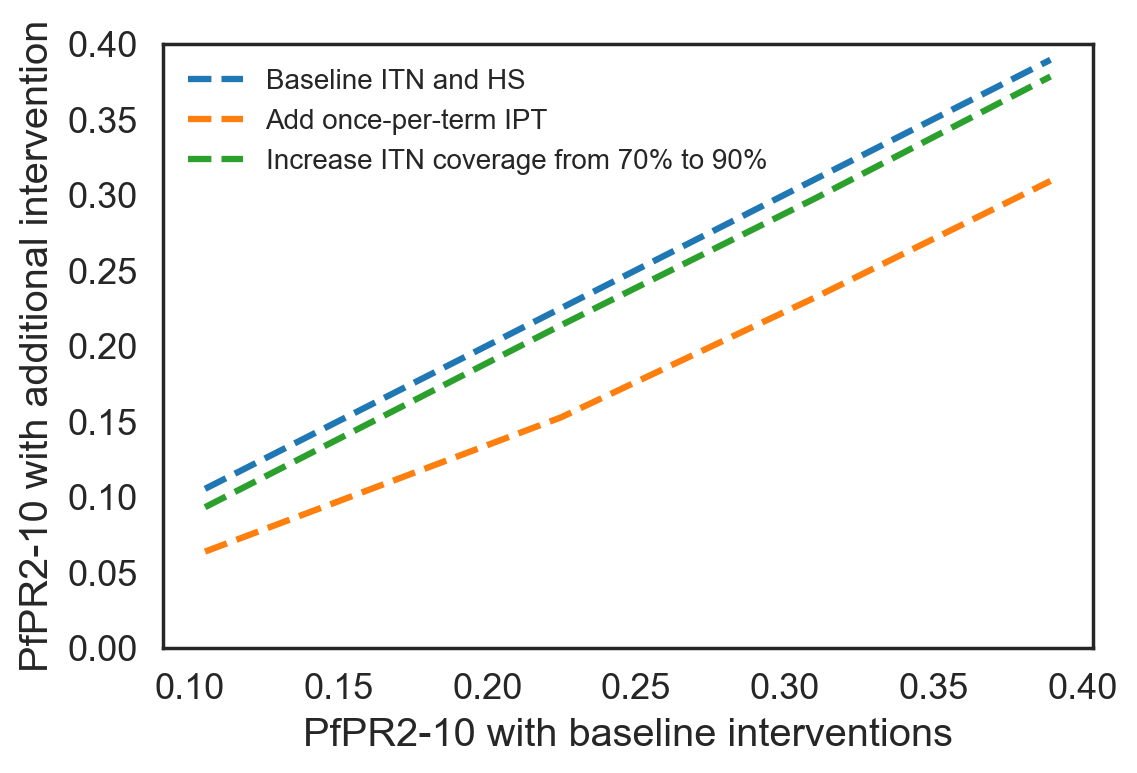

In [6]:
# Default IPT vs higher ITN coverage:
plt.figure(dpi=200)
plt.plot(np.array(df_baseline["pfpr2_10"]), np.array(df_baseline["pfpr2_10"]), linestyle='dashed', label="Baseline ITN and HS")
# plt.plot(np.array(df_baseline["pfpr2_10"]), np.array(df_allout["pfpr2_10"]), linestyle='dashed')

# Scenario 13: Southern,DP,IPT,term,default,default,0.9,0.15,default,False,13
s1 = df_agg_w_baseline[df_agg_w_baseline["scenario_number"]==13]
# Scenario 31: Southern,None,None,None,high,default,0.9,0.15,default,False,31
s2 = df_agg_w_baseline[df_agg_w_baseline["scenario_number"]==31]

plt.plot(s1["pfpr2_10_BASELINE"], s1["pfpr2_10"], linestyle='dashed', label="Add once-per-term IPT")
plt.plot(s2["pfpr2_10_BASELINE"], s2["pfpr2_10"], linestyle='dashed', label="Increase ITN coverage from 70% to 90%")

plt.legend(fontsize=10)
plt.ylim([0,0.4])

plt.xlabel("PfPR2-10 with baseline interventions")
plt.ylabel("PfPR2-10 with additional intervention")
# plt.plot( baseline

Text(0, 0.5, 'Prevalence (all-ages) with additional intervention')

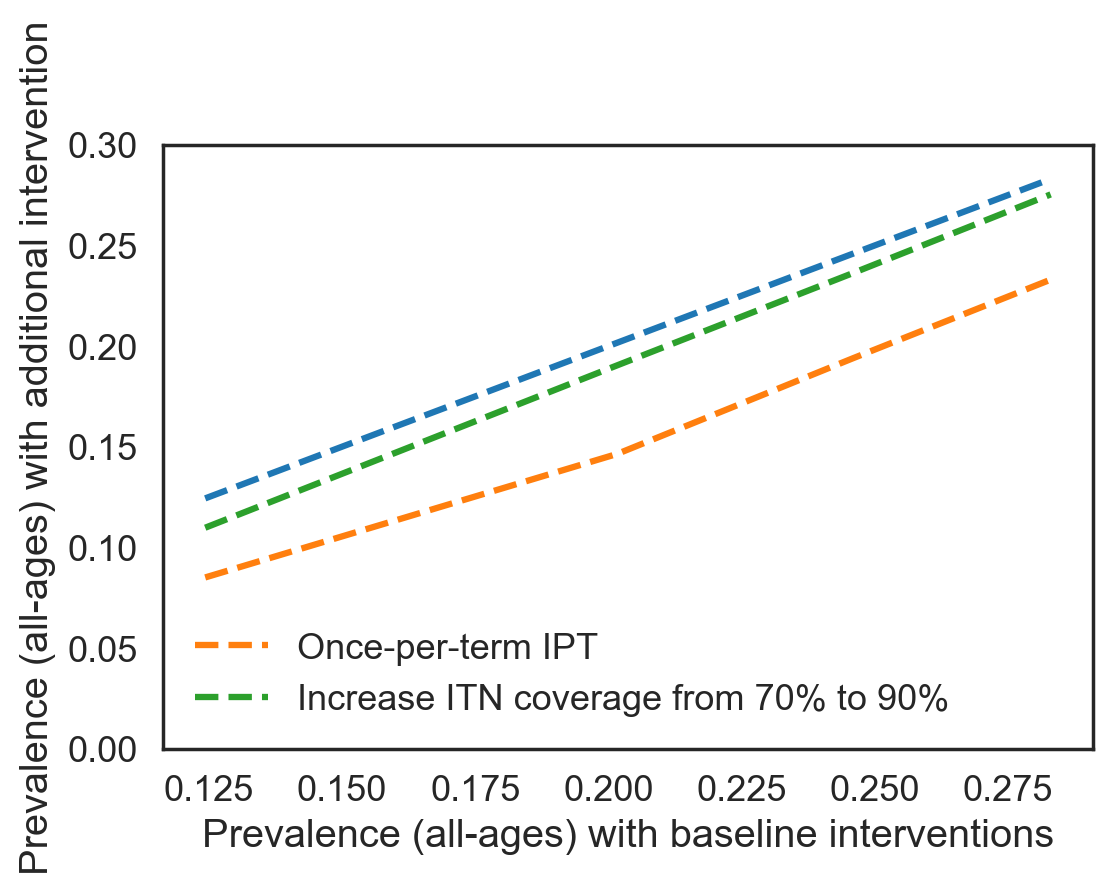

In [7]:
# Default IPT vs higher ITN coverage:
plt.figure(dpi=200)
plt.plot(np.array(df_baseline["pfpr_all"]), np.array(df_baseline["pfpr_all"]), linestyle='dashed')
# plt.plot(np.array(df_baseline["pfpr2_10"]), np.array(df_allout["pfpr2_10"]), linestyle='dashed')

# Scenario 13: Southern,DP,IPT,term,default,default,0.9,0.15,default,False,13
s1 = df_agg_w_baseline[df_agg_w_baseline["scenario_number"]==13]
# Scenario 31: Southern,None,None,None,high,default,0.9,0.15,default,False,31
s2 = df_agg_w_baseline[df_agg_w_baseline["scenario_number"]==31]

plt.plot(s1["pfpr_all_BASELINE"], s1["pfpr_all"], linestyle='dashed', label="Once-per-term IPT")
plt.plot(s2["pfpr_all_BASELINE"], s2["pfpr_all"], linestyle='dashed', label="Increase ITN coverage from 70% to 90%")

plt.legend()
plt.ylim([0,0.3])

plt.xlabel("Prevalence (all-ages) with baseline interventions")
plt.ylabel("Prevalence (all-ages) with additional intervention")

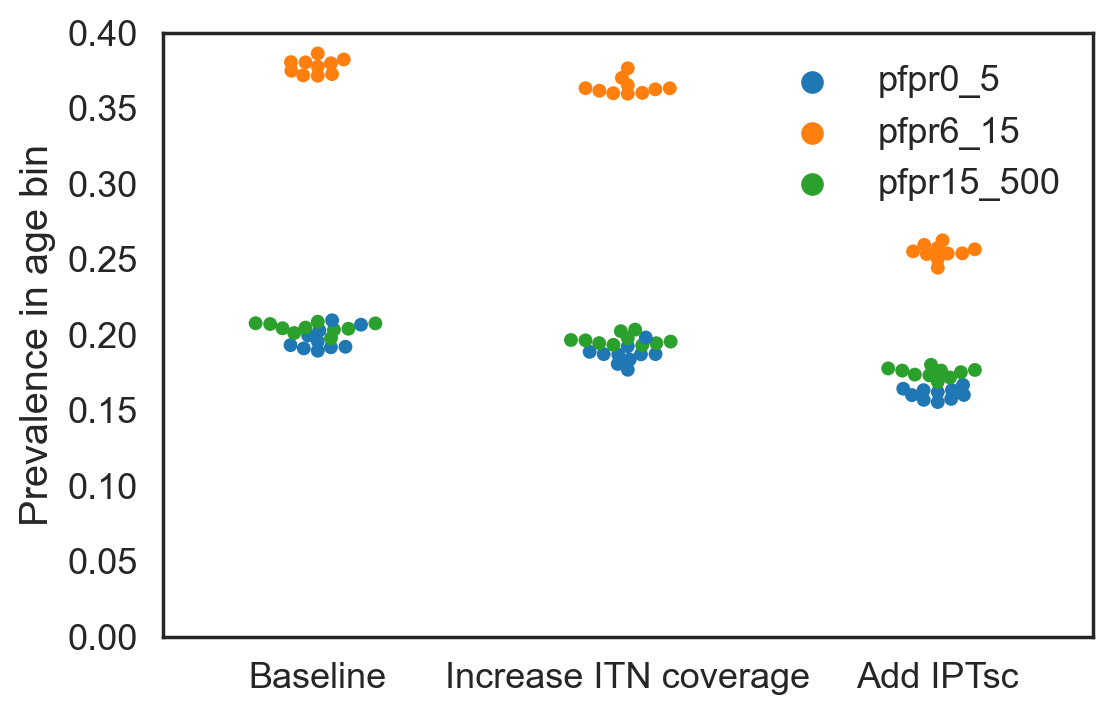

In [8]:
# Prevalence by age
ax = plt.figure(dpi=200)

# Scenario 13: Southern,DP,IPT,term,default,default,0.9,0.15,default,False,13
# Scenario 31: Southern,None,None,None,high,default,0.9,0.15,default,False,31
# Scenario 30 is baseline: Southern,None,None,None,default,default,0.9,0.0,default,False,30

df_plot = df[np.in1d(df["scenario_number"], [13,30,31])]
df_plot = df_plot[df_plot["burnin_approx_pfpr2_10"]==0.25]
df_plot_melt = pd.melt(df_plot, id_vars=['scenario_number'], value_vars=['pfpr0_5','pfpr6_15','pfpr15_500'])

sns.swarmplot(x="scenario_number", y="value", hue="variable", data=df_plot_melt, order=[30,31,13])
# plt.yticks
# plt.plot(s1["pfpr_all_BASELINE"], s1["pfpr_all"], linestyle='dashed', label="Once-per-term IPT")
# plt.plot(s2["pfpr_all_BASELINE"], s2["pfpr_all"], linestyle='dashed', label="Increase ITN coverage from 70% to 90%")

# plt.legend()
plt.ylim([0,0.4])
# ax.set_xticklabels(['zero','two','four'])
plt.xticks(ticks=[0,1,2],labels=['Baseline','Increase ITN coverage','Add IPTsc'])
plt.xlabel(None)
plt.ylabel("Prevalence in age bin")
plt.legend(title=None)

# plt.xlabel("Prevalence (all-ages) with baseline interventions")
# plt.ylabel("Prevalence (all-ages) with additional intervention")

In [9]:
df_plot = df_agg_w_baseline[np.in1d(df_agg_w_baseline["scenario_number"], [13,30,31])]

In [10]:
df_plot

burnin_approx_pfpr2_10  scenario_number   pfpr0_5  pfpr2_10  pfpr6_15  \
13                     0.05               13  0.032142  0.063573  0.085124   
30                     0.05               30  0.046357  0.105151  0.155454   
31                     0.05               31  0.041103  0.092988  0.137344   
47                     0.15               13  0.092961  0.152487  0.180088   
64                     0.15               30  0.122480  0.224783  0.292769   
65                     0.15               31  0.115549  0.213503  0.277486   
81                     0.25               13  0.160943  0.231737  0.254674   
98                     0.25               30  0.197138  0.310018  0.377746   
99                     0.25               31  0.186850  0.297313  0.364208   
115                    0.35               13  0.226241  0.309044  0.325092   
132                    0.35               30  0.259341  0.389298  0.453320   
133                    0.35               31  0.249883  0.378223  0.443559   

     pfpr15_500  pfpr_all  clinical_incidence0_5  clinical_incidence2_10  \
13     0.098710  0.085055               0.548547                0.672621   
30     0.133474  0.124321               0.813270                1.026971   
31     0.117897  0.109751               0.680627                0.893699   
47     0.145440  0.146436               1.486514                1.471446   
64     0.185608  0.201660               1.943879                2.092948   
65     0.174783  0.190438               1.830536                1.981803   
81     0.174929  0.193853               2.531391                2.133922   
98     0.204603  0.245805               2.995990                2.887315   
99     0.196677  0.236164               2.863583                2.756325   
115    0.193051  0.232982               3.458857                2.605544   
132    0.217736  0.282967               3.956012                3.511852   
133    0.211679  0.275296               3.803752                3.411265   

     clinical_incidence6_15               ...                 \
13                 0.647406               ...                  
30                 1.126351               ...                  
31                 1.013849               ...                  
47                 1.126818               ...                  
64                 1.898821               ...                  
65                 1.820835               ...                  
81                 1.252824               ...                  
98                 2.284892               ...                  
99                 2.197269               ...                  
115                1.255115               ...                  
132                2.471562               ...                  
133                2.444622               ...                  

     pop2_10_BASELINE  pop6_15_BASELINE  pop15_500_BASELINE  pop_all_BASELINE  \
13        1123.899452       1088.566849         2982.080548       4986.770137   
30        1123.899452       1088.566849         2982.080548       4986.770137   
31        1123.899452       1088.566849         2982.080548       4986.770137   
47        1164.875616       1138.870411         2943.380548       5037.187123   
64        1164.875616       1138.870411         2943.380548       5037.187123   
65        1164.875616       1138.870411         2943.380548       5037.187123   
81        1155.678356       1090.597534         2926.492877       4974.979178   
98        1155.678356       1090.597534         2926.492877       4974.979178   
99        1155.678356       1090.597534         2926.492877       4974.979178   
115       1129.823562       1106.489041         2934.400274       4981.860000   
132       1129.823562       1106.489041         2934.400274       4981.860000   
133       1129.823562       1106.489041         2934.400274       4981.860000   

     burnin_habitat_scale_BASELINE  out_of_school_rate_BASELINE  \
13                             7.1             

In [11]:
pd.melt(df_plot, id_vars=['scenario_number'], value_vars=['pfpr0_5','pfpr6_15','pfpr15_500'])

scenario_number    variable     value
0                13     pfpr0_5  0.032142
1                30     pfpr0_5  0.046357
2                31     pfpr0_5  0.041103
3                13     pfpr0_5  0.092961
4                30     pfpr0_5  0.122480
5                31     pfpr0_5  0.115549
6                13     pfpr0_5  0.160943
7                30     pfpr0_5  0.197138
8                31     pfpr0_5  0.186850
9                13     pfpr0_5  0.226241
10               30     pfpr0_5  0.259341
11               31     pfpr0_5  0.249883
12               13    pfpr6_15  0.085124
13               30    pfpr6_15  0.155454
14               31    pfpr6_15  0.137344
15               13    pfpr6_15  0.180088
16               30    pfpr6_15  0.292769
17               31    pfpr6_15  0.277486
18               13    pfpr6_15  0.254674
19               30    pfpr6_15  0.377746
20               31    pfpr6_15  0.364208
21               13    pfpr6_15  0.325092
22               30    pfpr6_15  0.453320
23               31    pfpr6_15  0.443559
24               13  pfpr15_500  0.098710
25               30  pfpr15_500  0.133474
26               31  pfpr15_500  0.117897
27               13  pfpr15_500  0.145440
28               30  pfpr15_500  0.185608
29               31  pfpr15_500  0.174783
30               13  pfpr15_500  0.174929
31               30  pfpr15_500  0.204603
32               31  pfpr15_500  0.196677
33               13  pfpr15_500  0.193051
34               30  pfpr15_500  0.217736
35               31  pfpr15_500  0.211679

# IPT modality

## Within school coverage

In [20]:
def modality_plot_by_group(scenarios, label_dict, suptitle=None, color_dict=None, linestyle_dict=None):
    plt.close("all")
    plt.figure(dpi=300, figsize=(10,5))
    
    metrics = ["pfpr0_5", "pfpr6_15", "pfpr15_500"]
    
    s_dict = {}
    for s in scenarios:
        s_dict[s] = df_agg_w_baseline[df_agg_w_baseline["scenario_number"]==s]
    
    for i in range(3):
        metric = metrics[i]
        ax = plt.subplot(1,3,i+1)
        
        if metric == "pfpr0_5":
            plt.ylim([0,0.55])
        elif metric == "pfpr6_15":
            plt.ylim([0,0.55])
        elif metric == "pfpr15_500":
            plt.ylim([0,0.55])
        
        for s in scenarios:
            linestyle='solid'
            c = None
            if s == 30:
                linestyle='dashed'
                c = 'gray'
            else:
                if color_dict:
                    c = color_dict[s]
                if linestyle_dict:
                    linestyle = linestyle_dict[s]
                
            x = s_dict[s]["{}_BASELINE".format(metric)]
            y = s_dict[s][metric]
            plt.plot(x,y, label=label_dict[s], linestyle=linestyle, c=c)

        if i == 2:
            plt.legend(fontsize=10)
        plt.xlabel("Baseline prevalence".format(metric))
        plt.ylabel(metric)
#         plt.title(metric)

    plt.suptitle(suptitle)
    plt.tight_layout()
    plt.show()

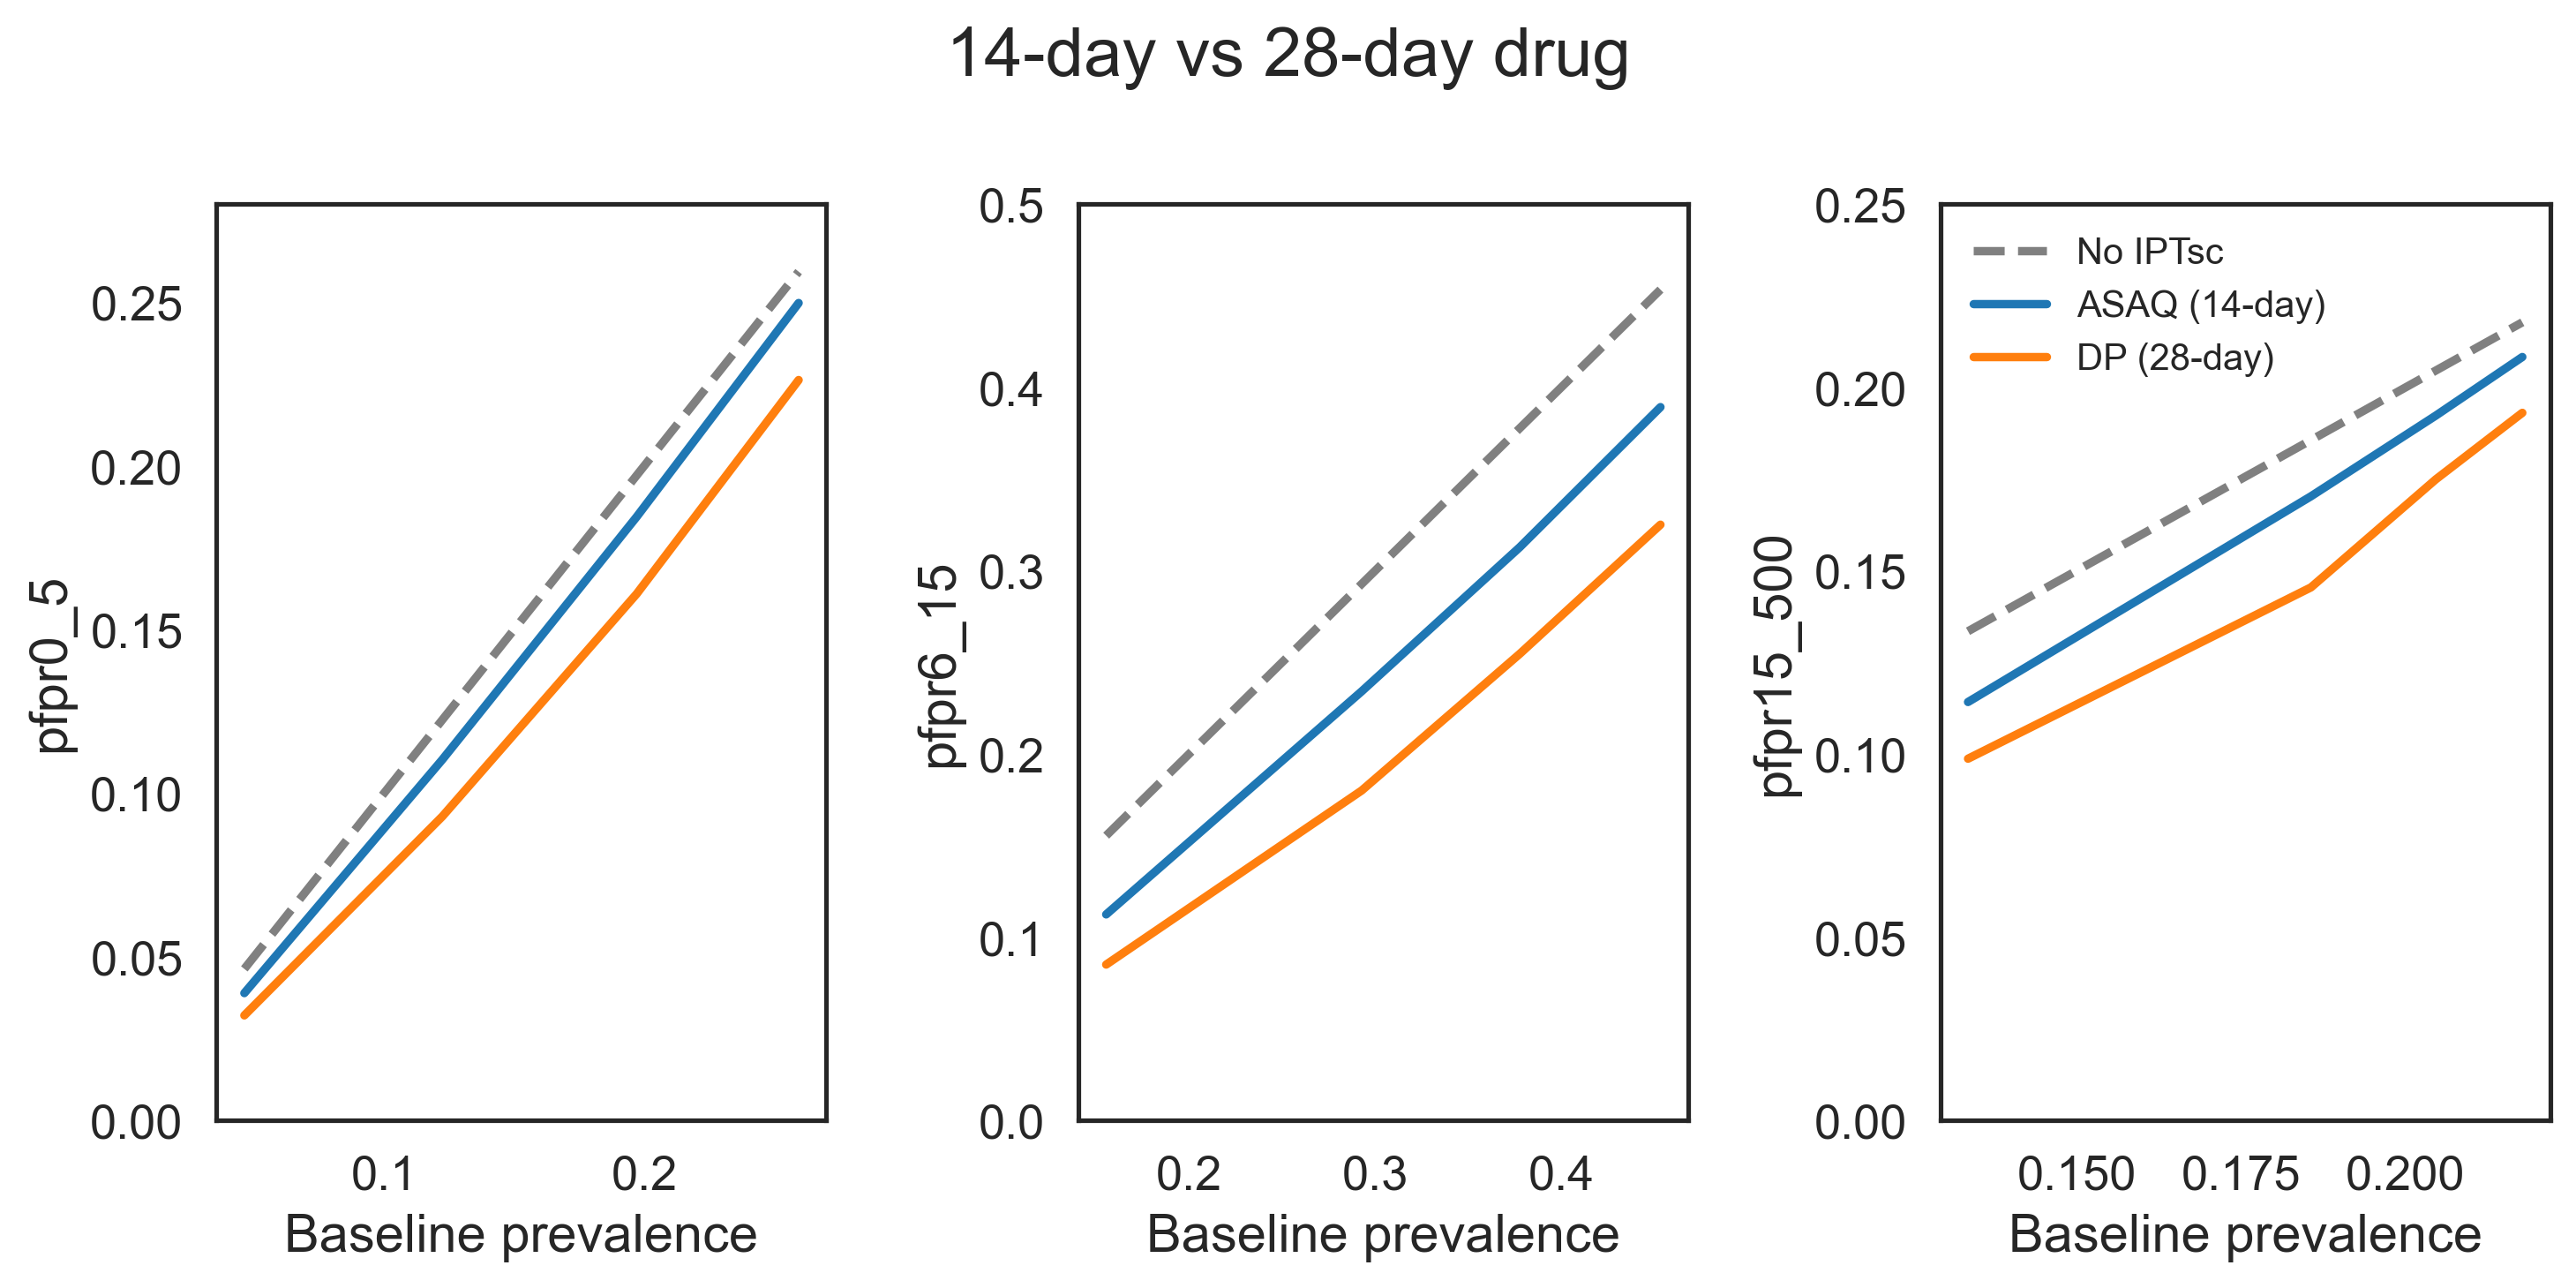

In [13]:
scenario_dict = {
    30: "No IPTsc",
    13: "DP (28-day)",
    1: "ASAQ (14-day)"
}
modality_plot_by_group([30,1,13], scenario_dict, suptitle="14-day vs 28-day drug")

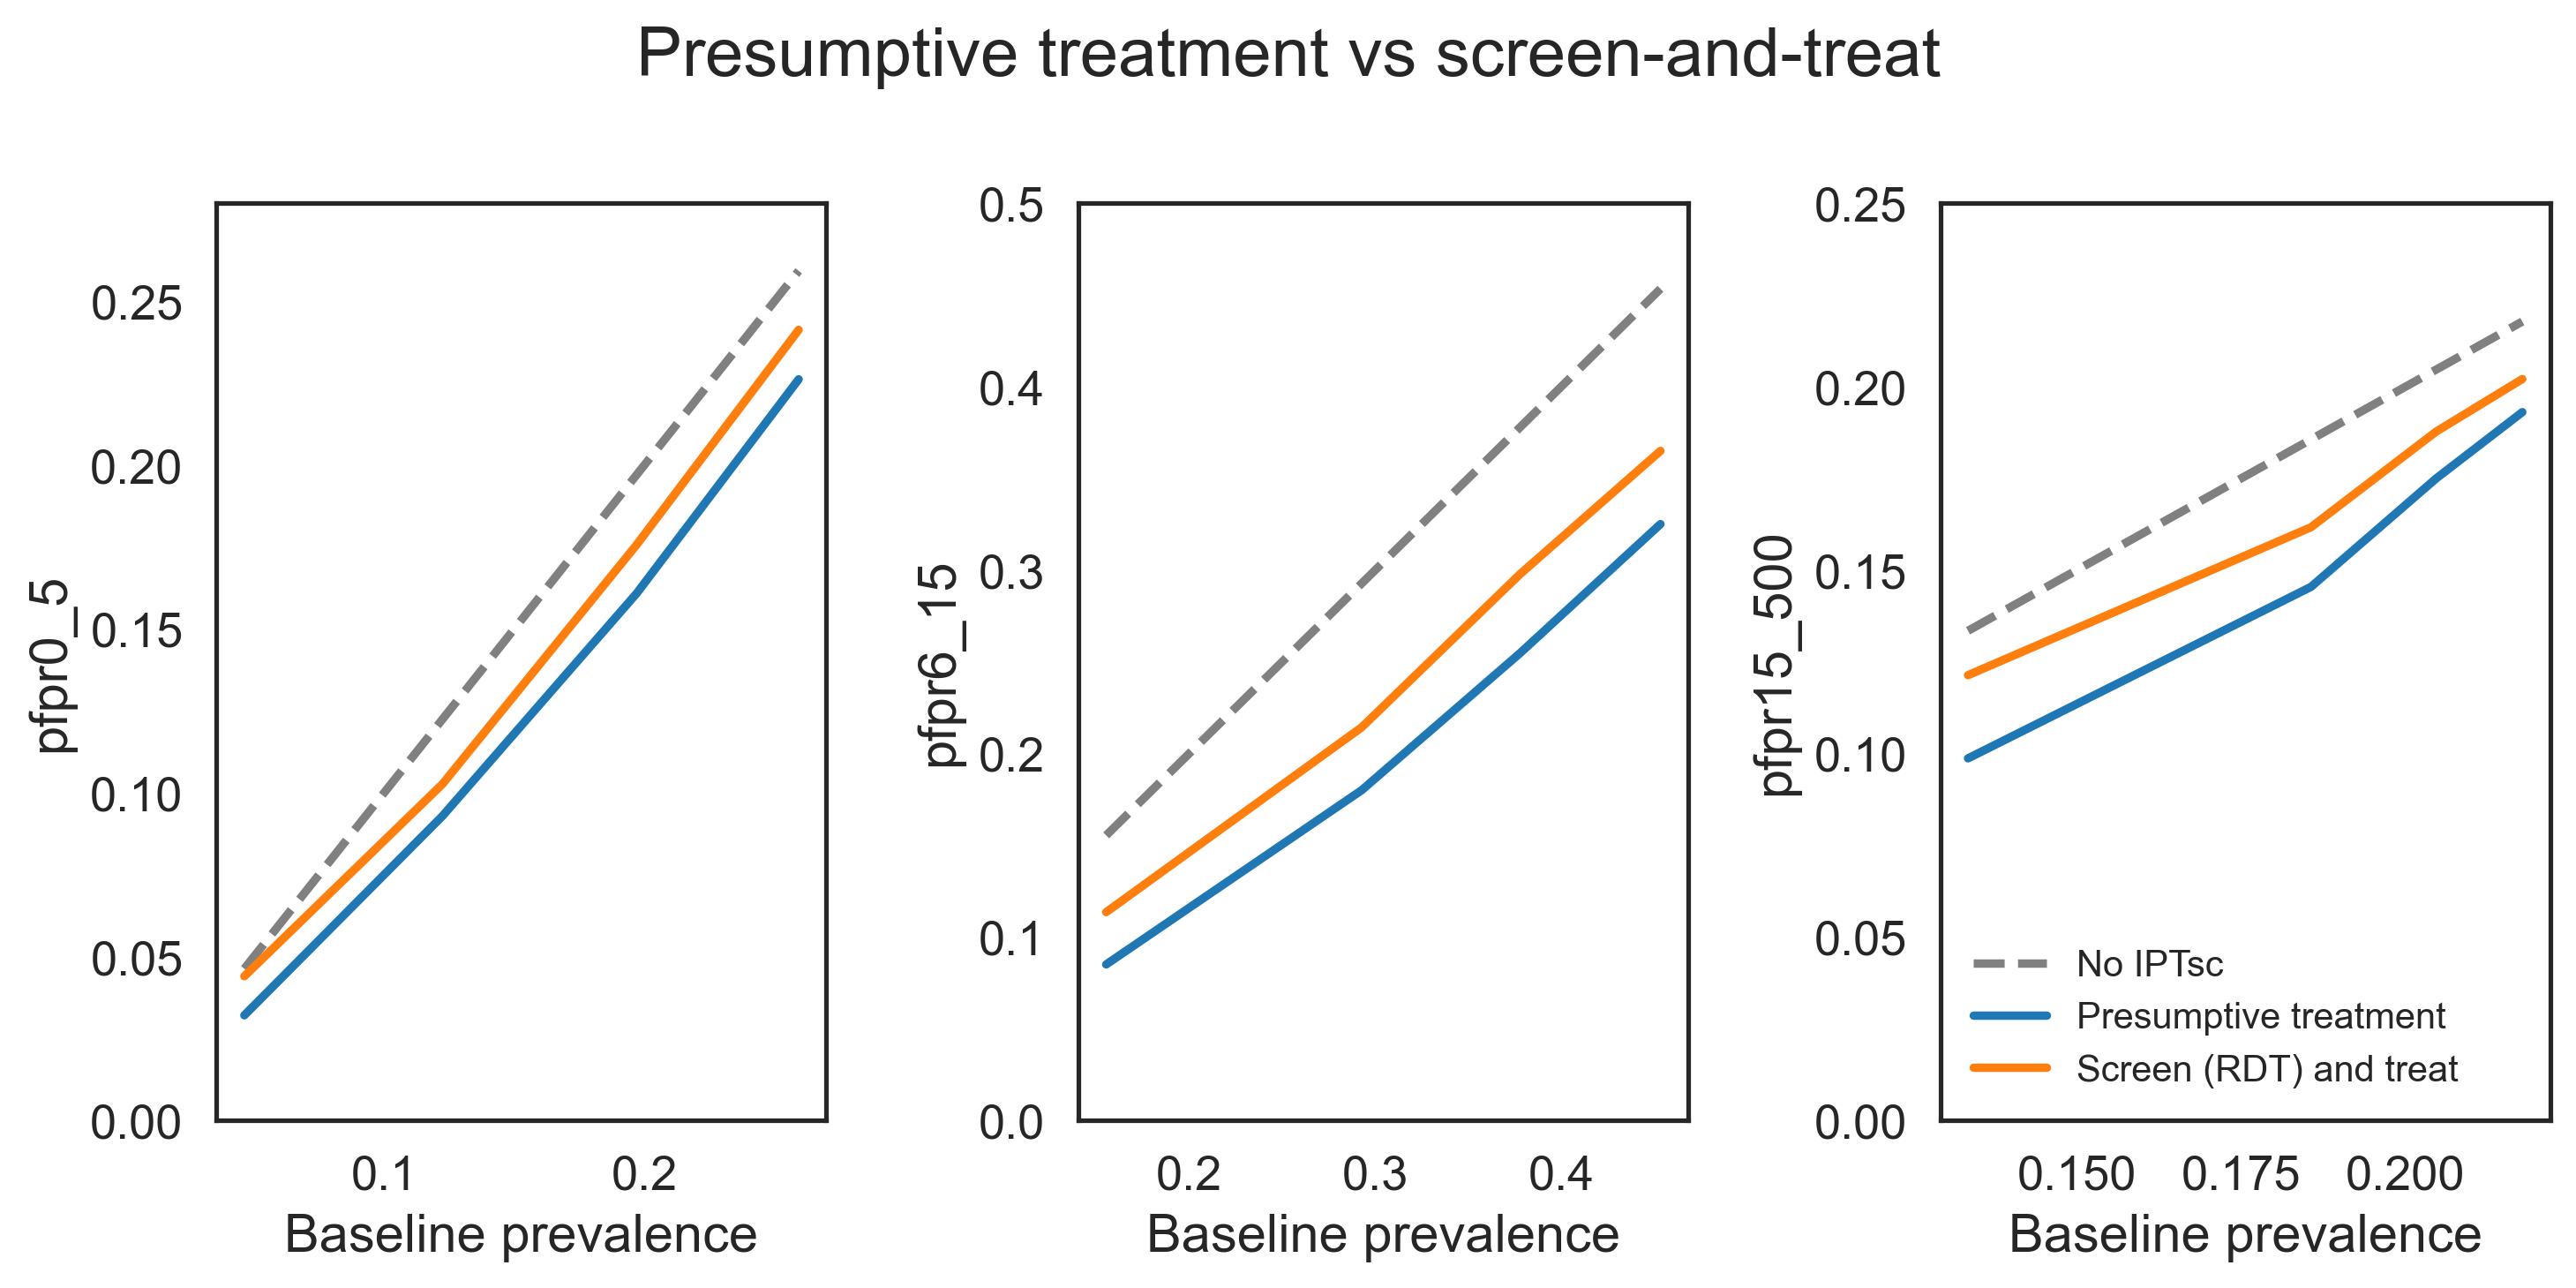

In [14]:
scenario_dict = {
    30: "No IPTsc",
    13: "Presumptive treatment",
    19: "Screen (RDT) and treat"
}

modality_plot_by_group(list(scenario_dict.keys()), scenario_dict, suptitle="Presumptive treatment vs screen-and-treat")

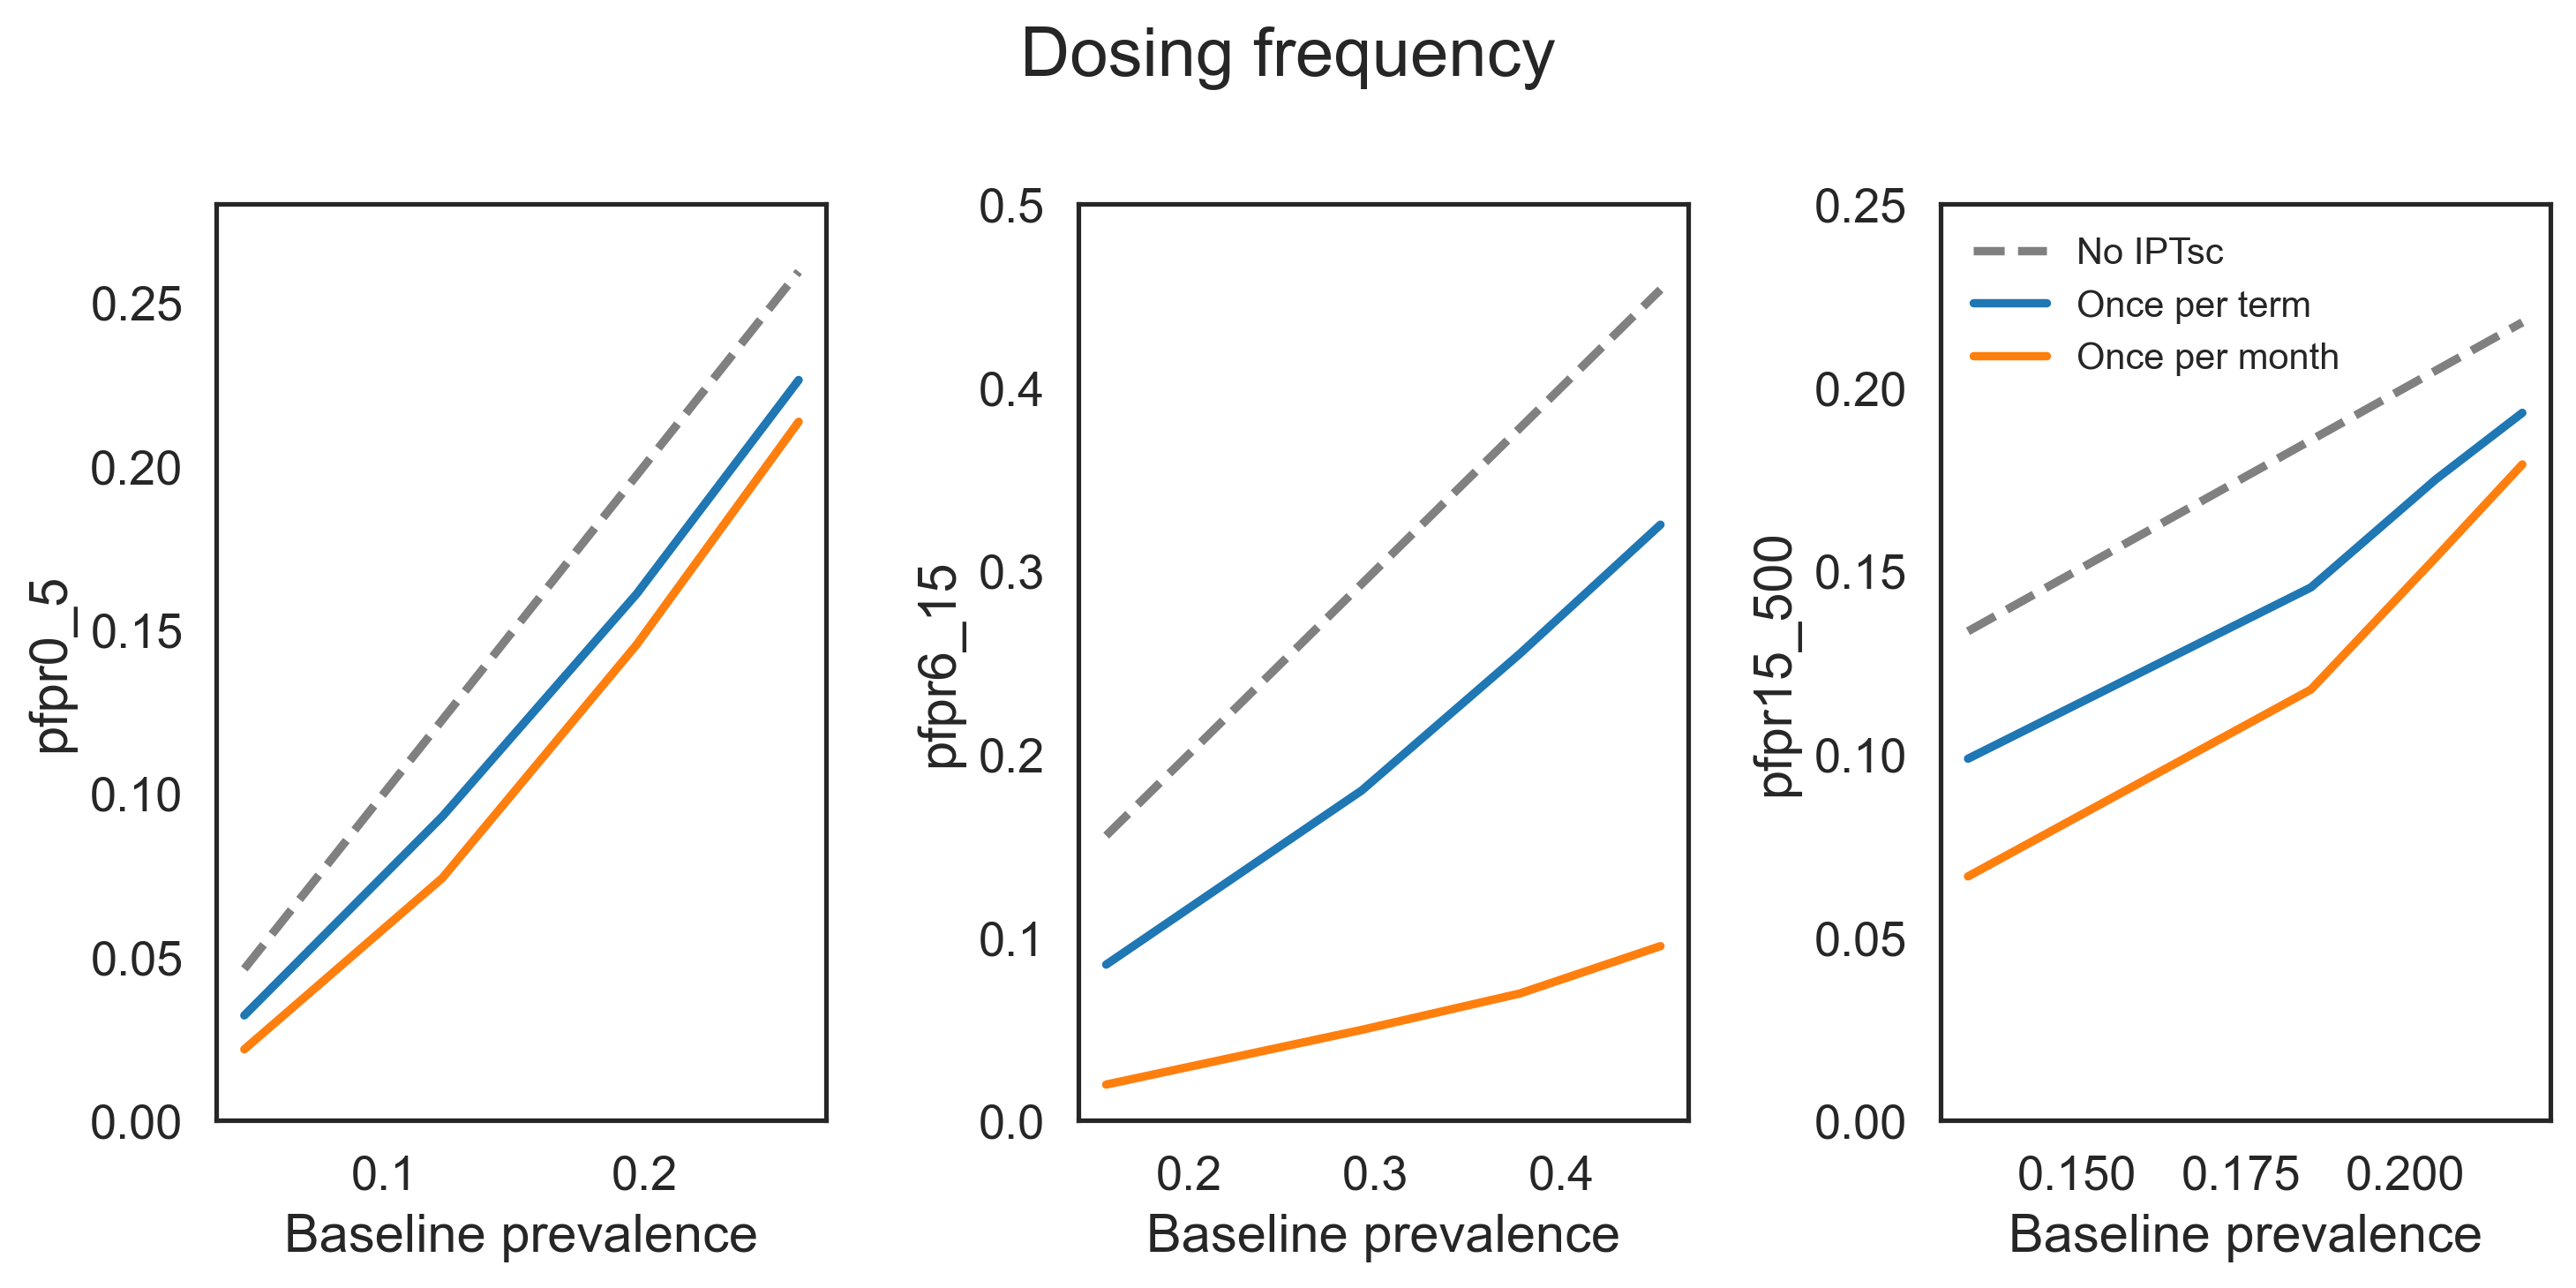

In [15]:
scenario_dict = {
    30: "No IPTsc",
    13: "Once per term",
    16: "Once per month"
}

modality_plot_by_group(list(scenario_dict.keys()), scenario_dict, suptitle="Dosing frequency")

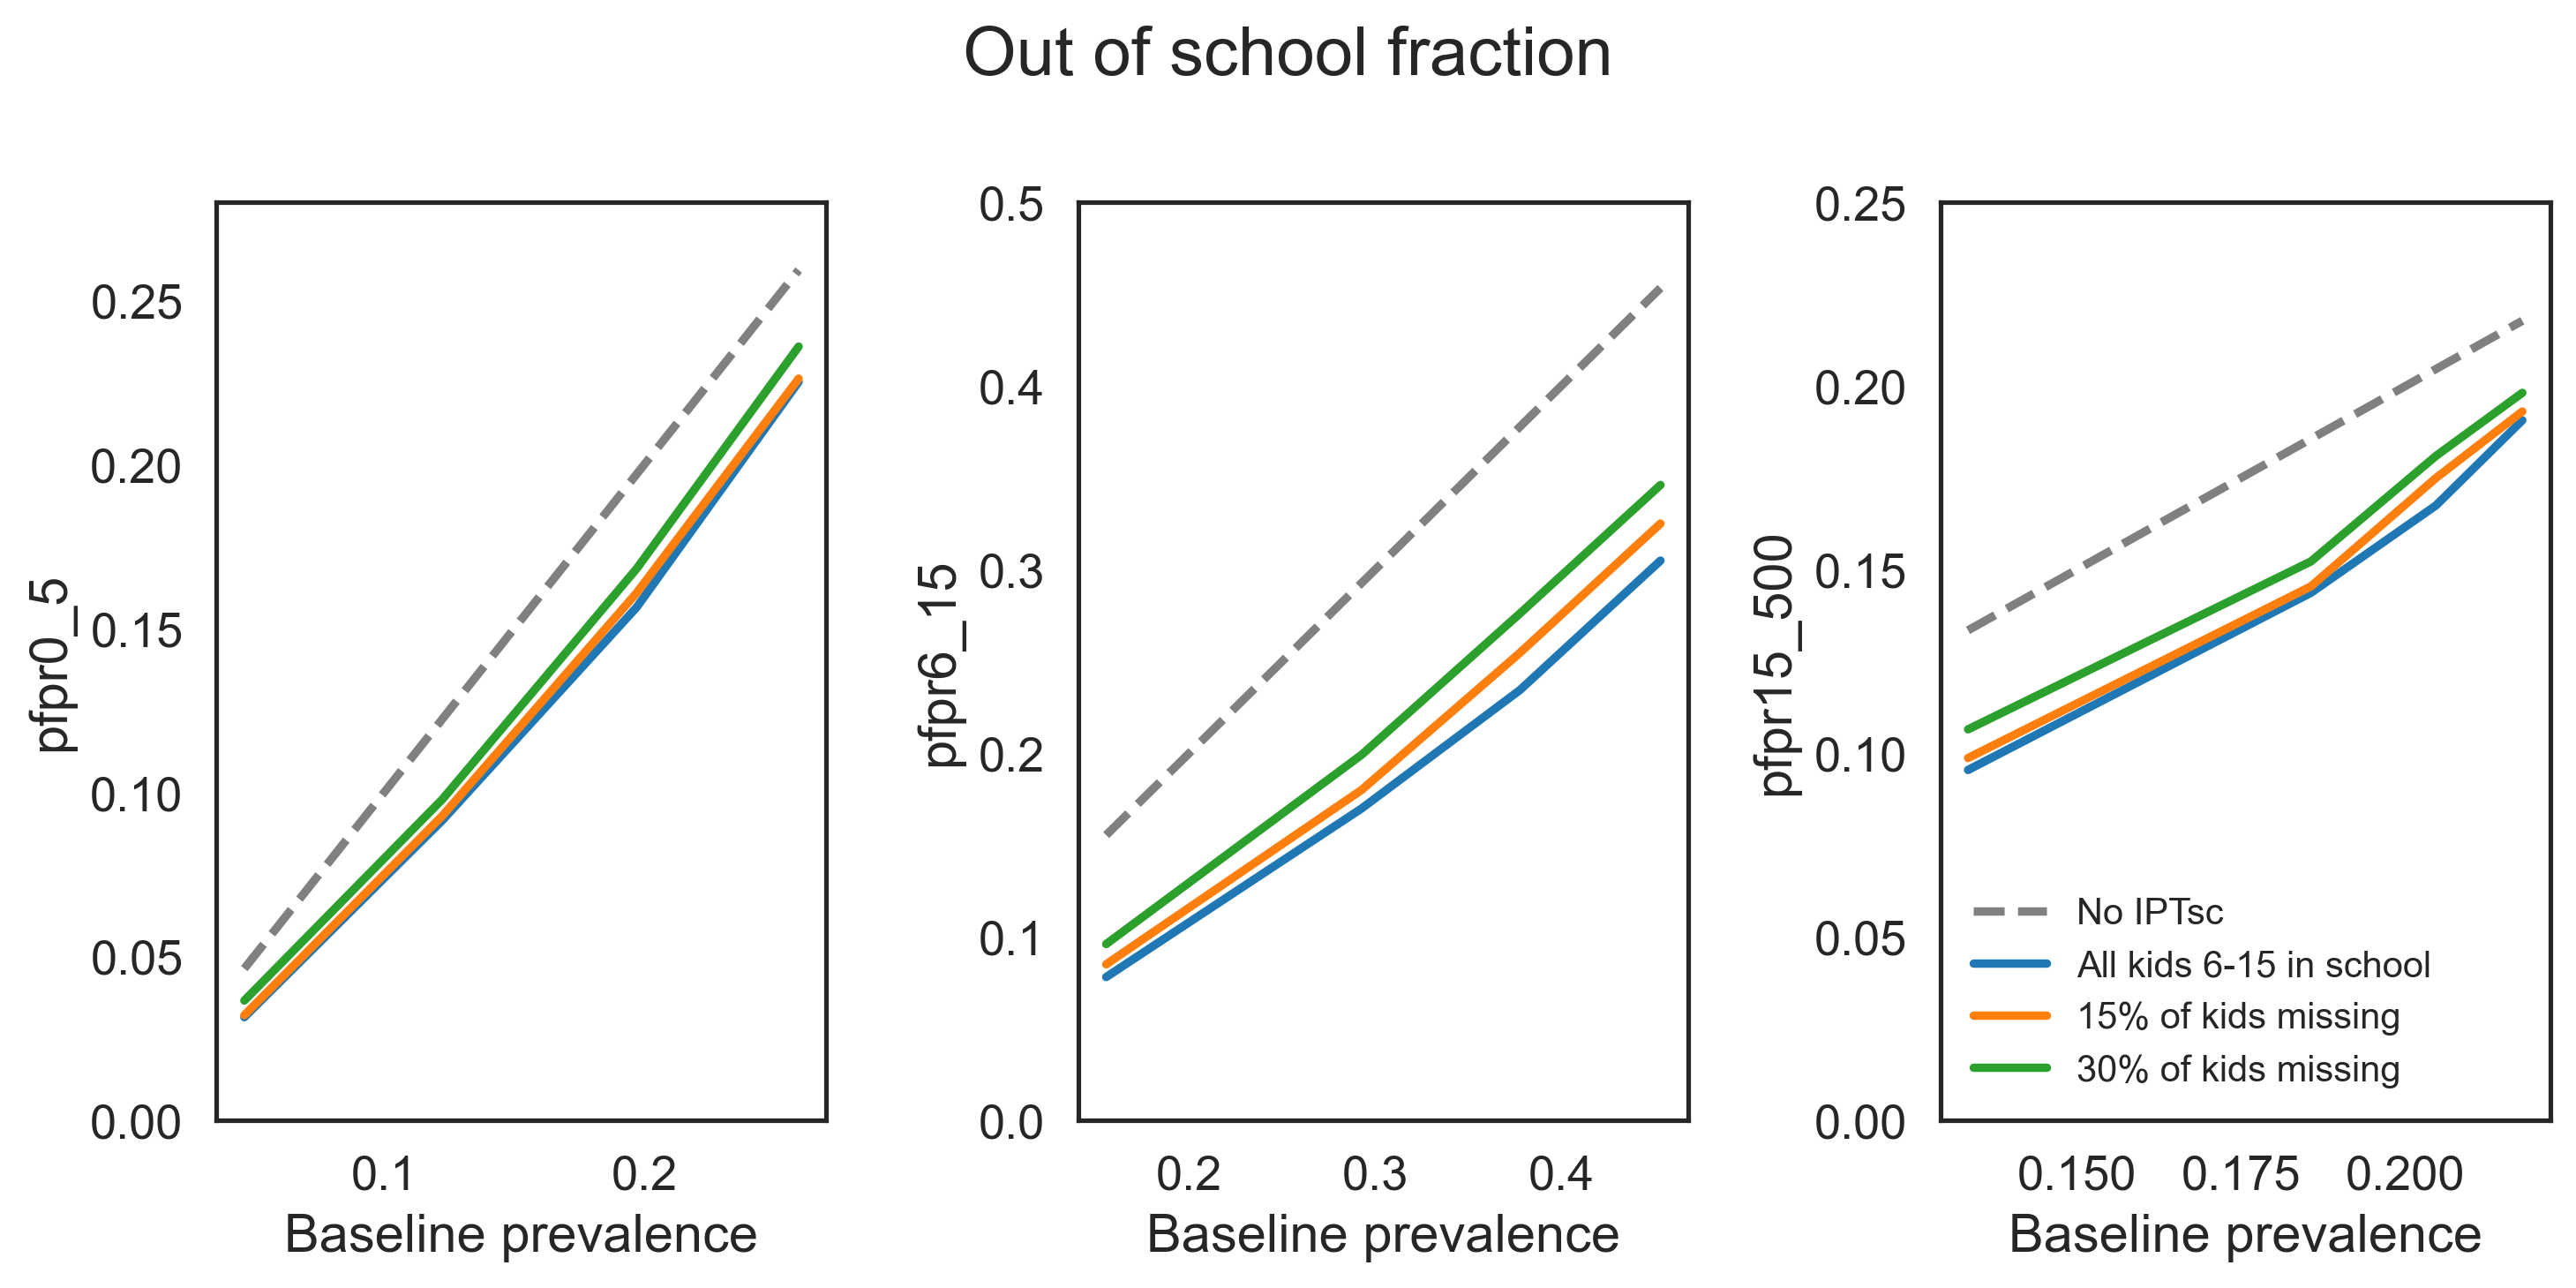

In [16]:
scenario_dict = {
    30: "No IPTsc",
    12: "All kids 6-15 in school",
    13: "15% of kids missing",
    14: "30% of kids missing"
}

modality_plot_by_group(list(scenario_dict.keys()), scenario_dict, suptitle="Out of school fraction")

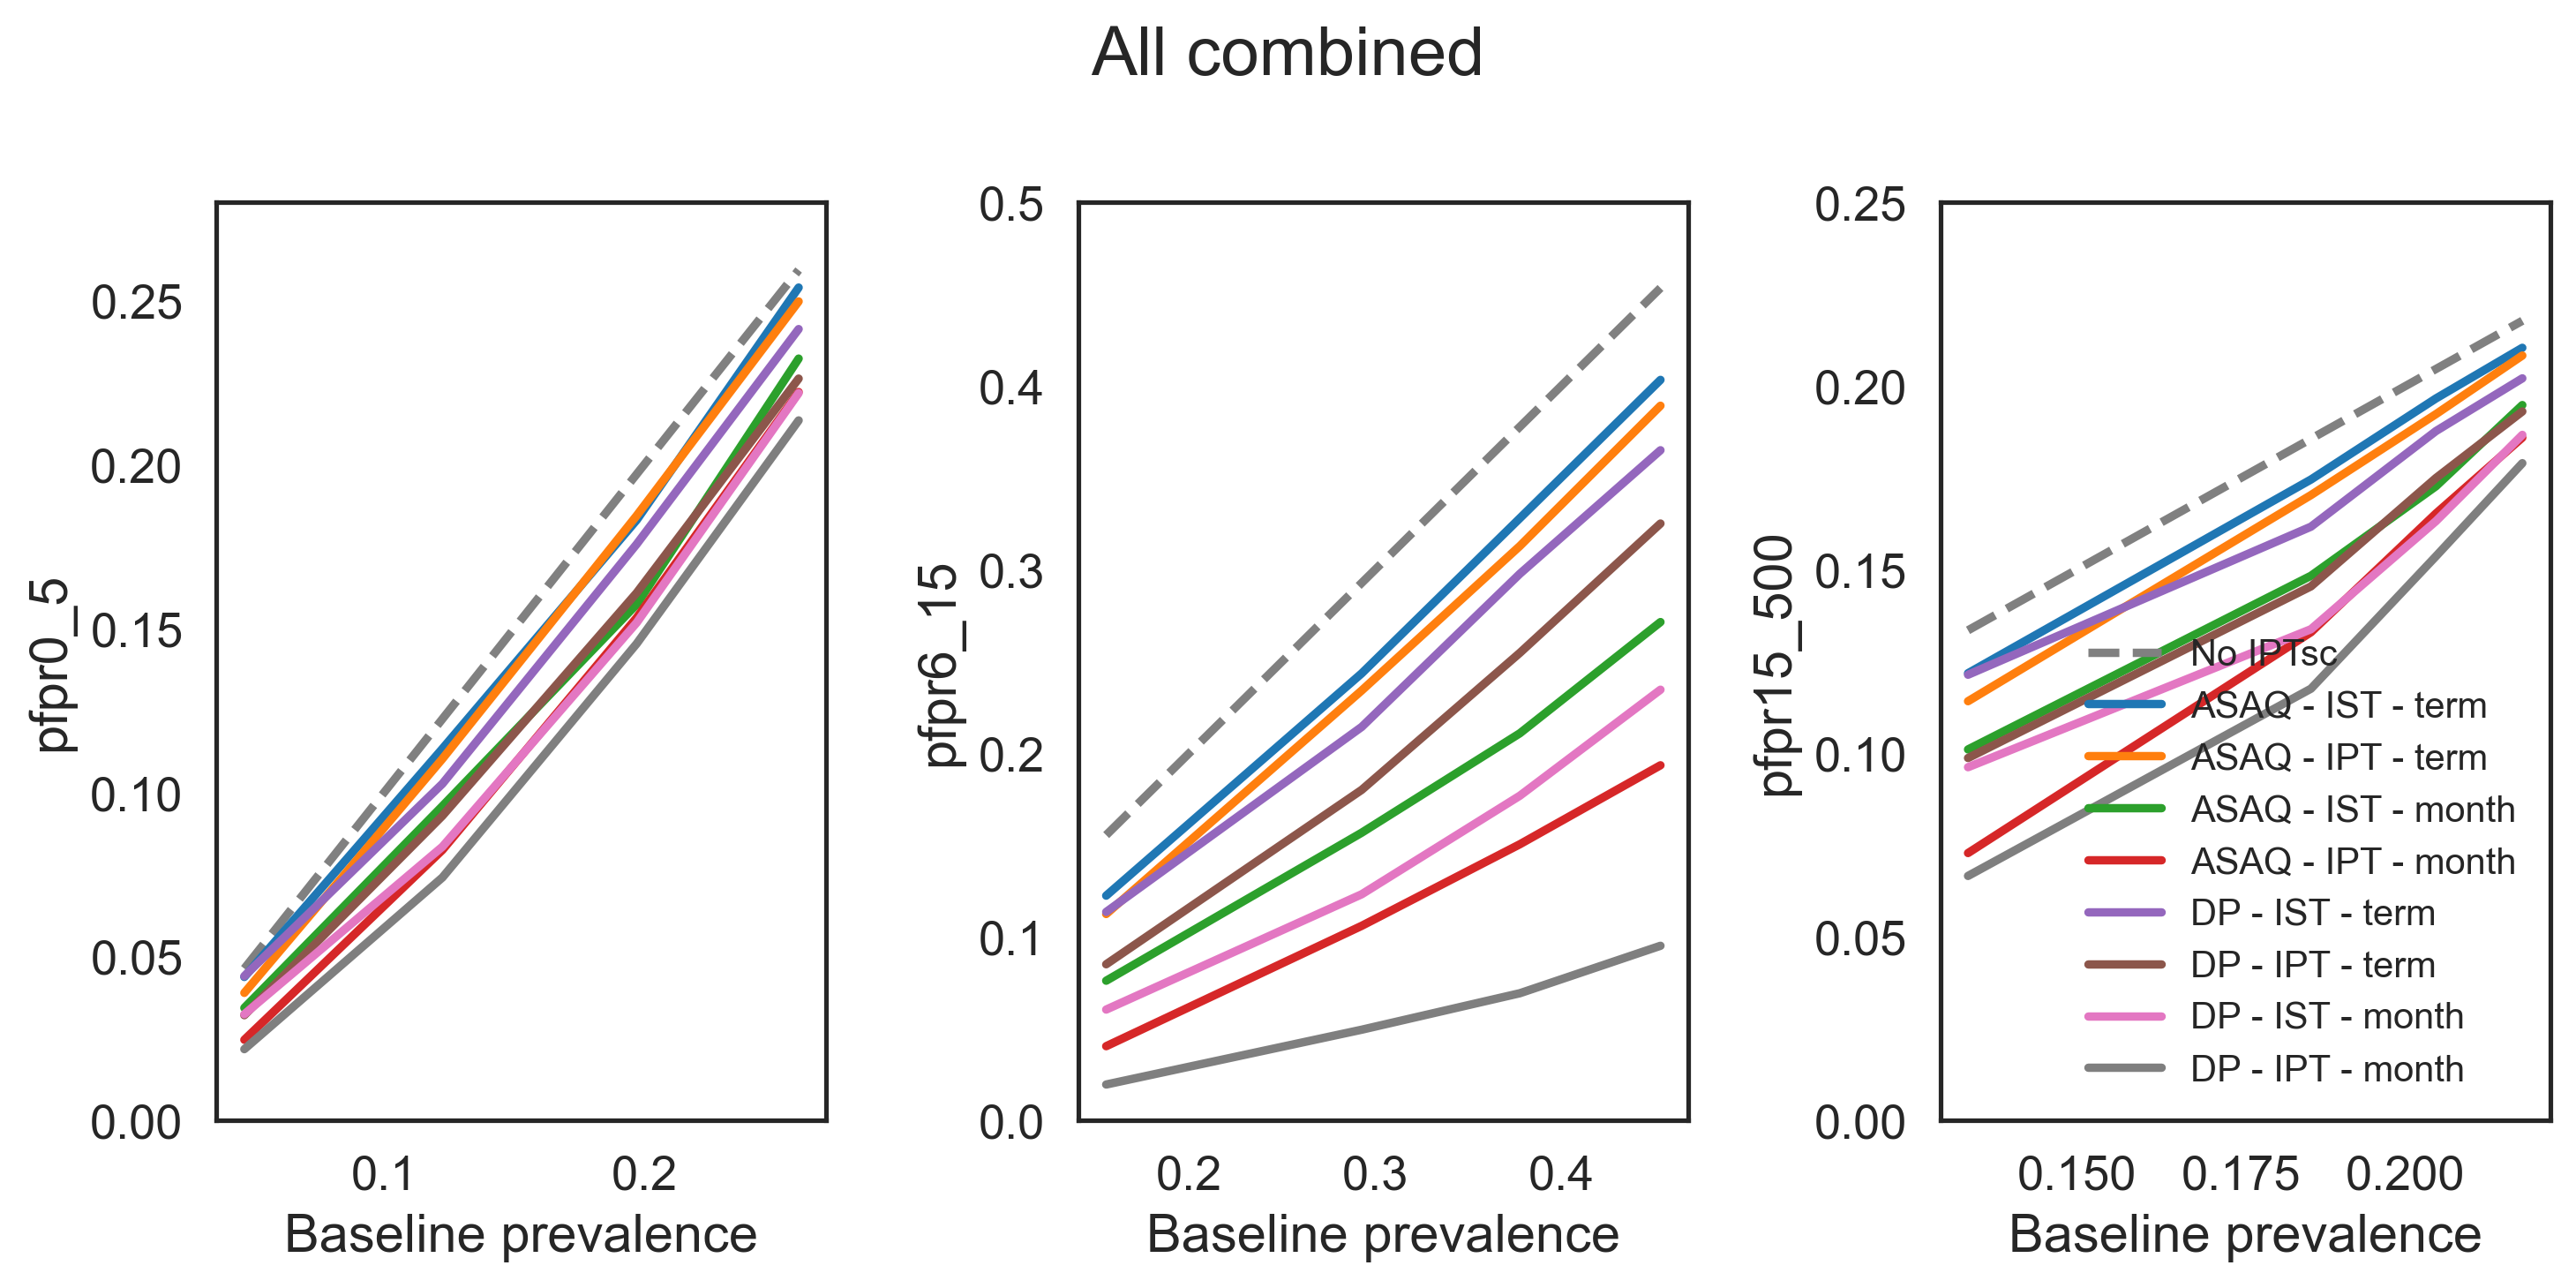

In [17]:
scenario_dict = {
    30: "No IPTsc",
    7: "ASAQ - IST - term",
    1: "ASAQ - IPT - term",
    10: "ASAQ - IST - month",
    4: "ASAQ - IPT - month",
    19: "DP - IST - term",
    13: "DP - IPT - term",
    22: "DP - IST - month",
    16: "DP - IPT - month",
}

modality_plot_by_group(list(scenario_dict.keys()), scenario_dict, suptitle="All combined")

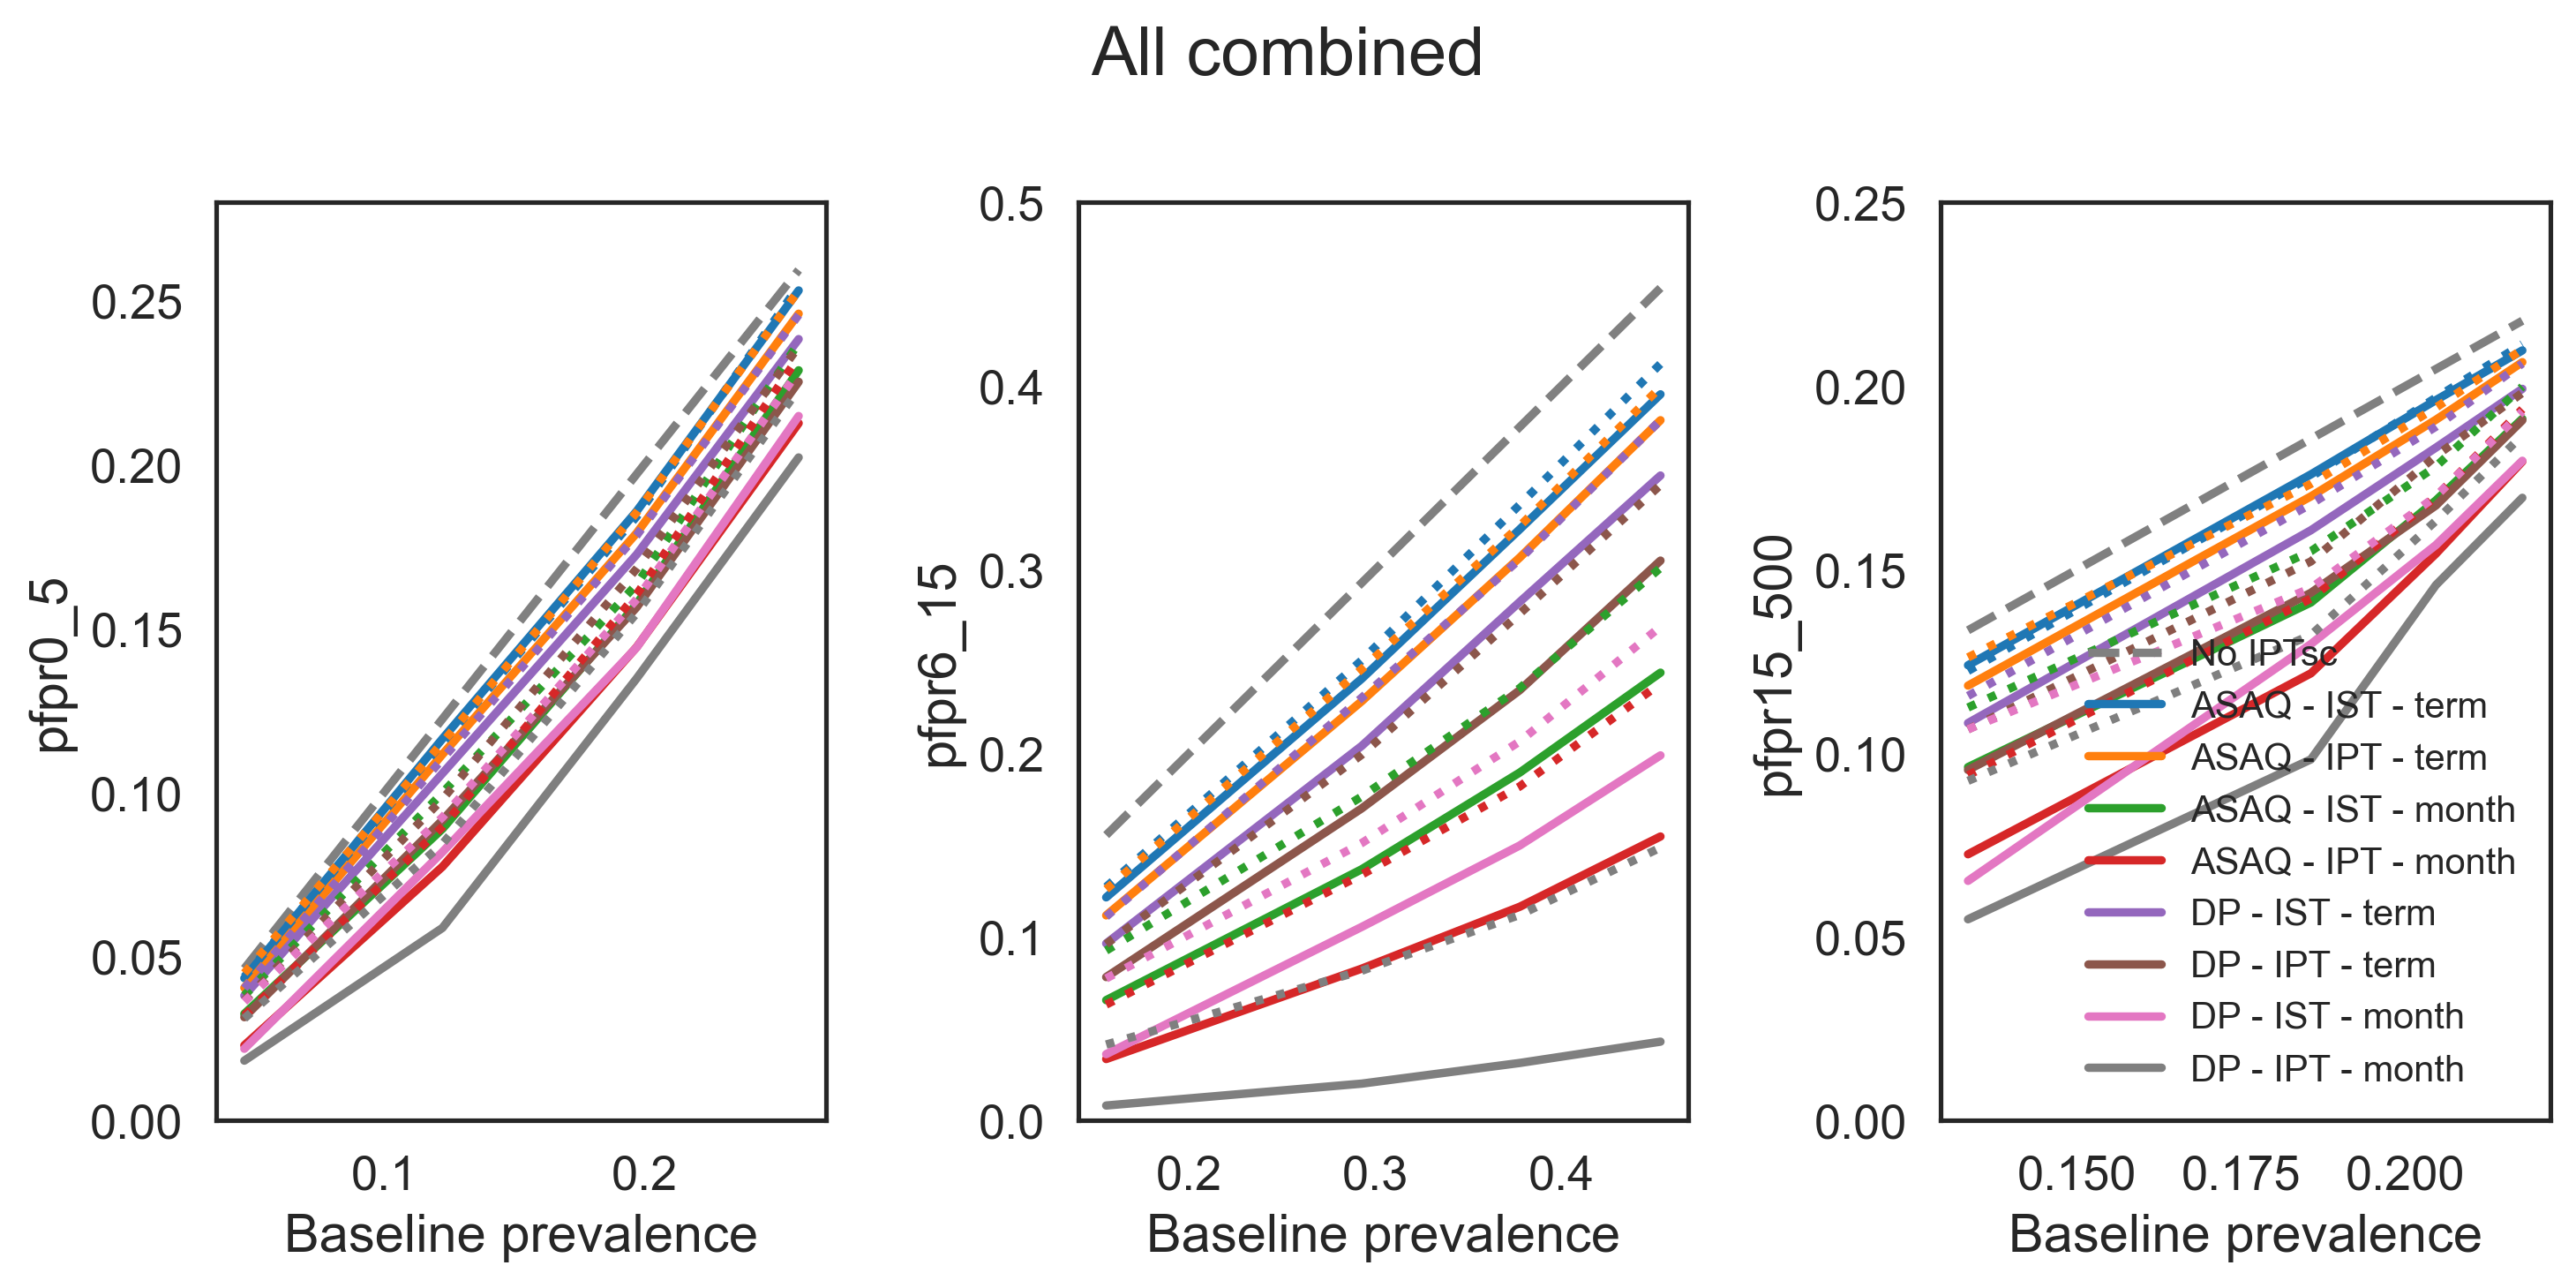

In [18]:
scenario_dict = {
    30: "No IPTsc",
    6: "ASAQ - IST - term",
    0: "ASAQ - IPT - term",
    9: "ASAQ - IST - month",
    3: "ASAQ - IPT - month",
    18: "DP - IST - term",
    12: "DP - IPT - term",
    21: "DP - IST - month",
    15: "DP - IPT - month",
    
    8: None,
    2: None,
    11: None,
    5: None,
    20: None,
    14: None,
    23: None,
    17: None,
}

s = [6,0,9,3,18,12,21,15]

color_dict = {}
linestyle_dict = {}
for i in range(len(s)):
    color_dict[s[i]] = "C{}".format(i)
    color_dict[s[i]+2] = "C{}".format(i)
    linestyle_dict[s[i]] = "solid"
    linestyle_dict[s[i]+2] = "dotted"
    
modality_plot_by_group(list(scenario_dict.keys()), 
                       scenario_dict, 
                       suptitle="All combined", 
                       color_dict=color_dict, 
                       linestyle_dict=linestyle_dict)

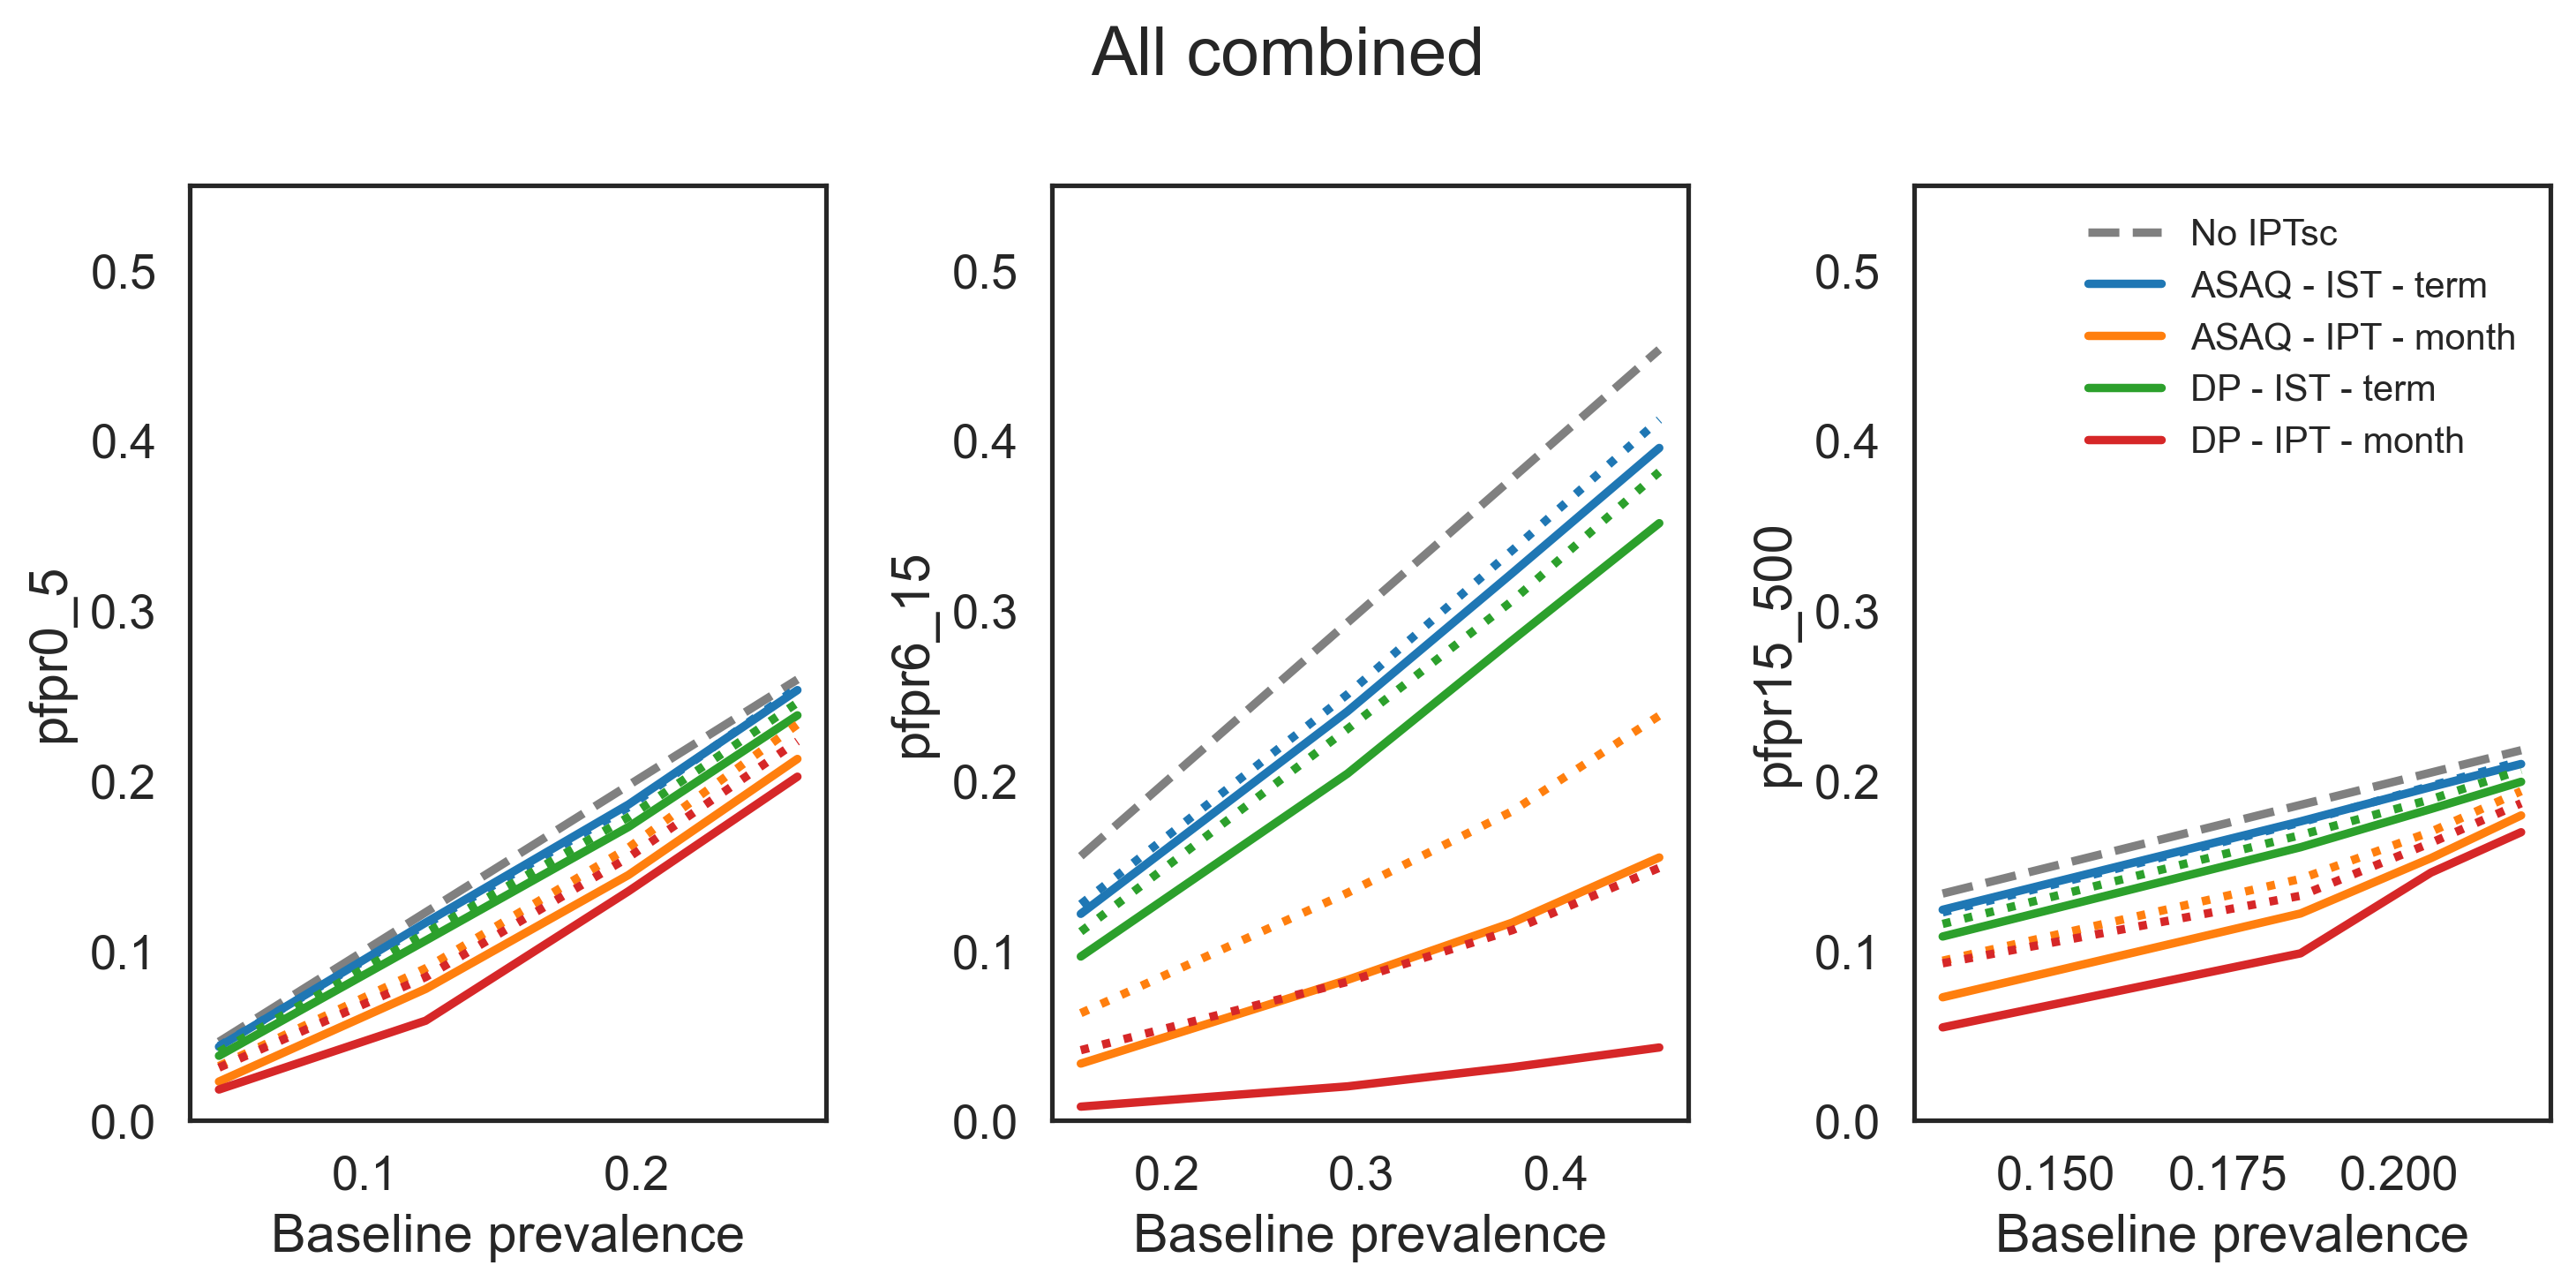

In [21]:
scenario_dict = {
    30: "No IPTsc",
    6: "ASAQ - IST - term",
    3: "ASAQ - IPT - month",
    18: "DP - IST - term",
    15: "DP - IPT - month",
    
    8: None,
    5: None,
    20: None,
    17: None,
}

s = [6,3,18,15]

color_dict = {}
linestyle_dict = {}
for i in range(len(s)):
    color_dict[s[i]] = "C{}".format(i)
    color_dict[s[i]+2] = "C{}".format(i)
    linestyle_dict[s[i]] = "solid"
    linestyle_dict[s[i]+2] = "dotted"
    
modality_plot_by_group(list(scenario_dict.keys()), 
                       scenario_dict, 
                       suptitle="All combined", 
                       color_dict=color_dict, 
                       linestyle_dict=linestyle_dict)

# Targeting school age vs younger

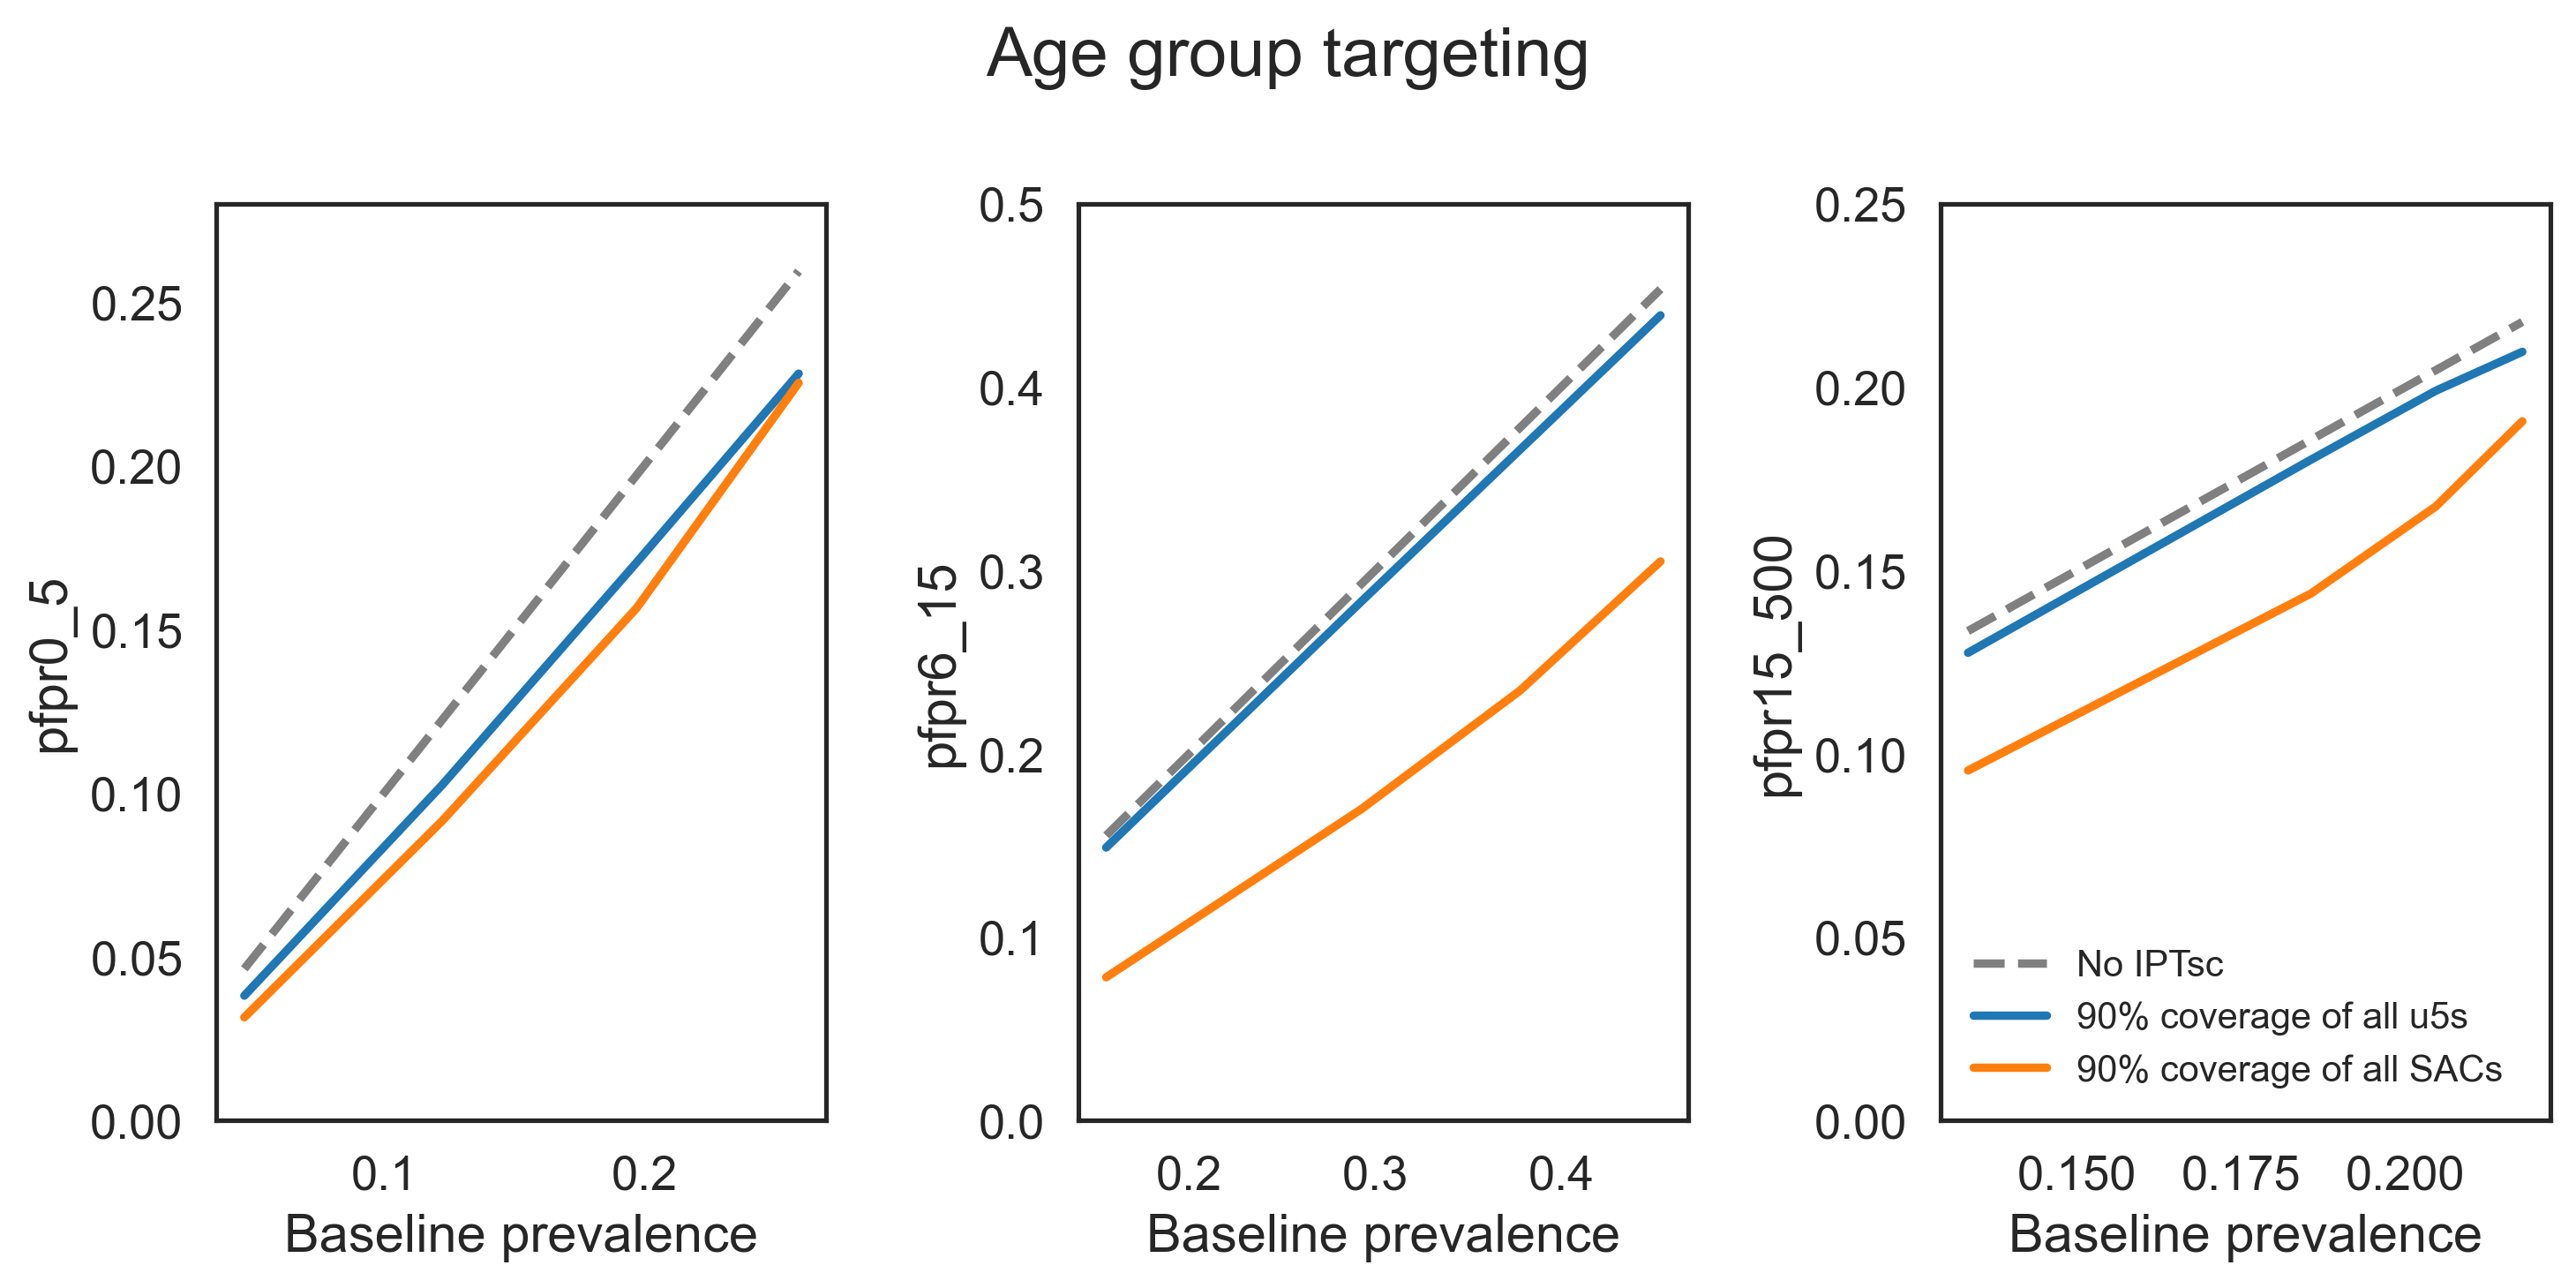

In [242]:
scenario_dict = {
    30: "No IPTsc",
    32: "90% coverage of all u5s",
    12: "90% coverage of all SACs",
}

modality_plot_by_group(list(scenario_dict.keys()), scenario_dict, suptitle="Age group targeting")

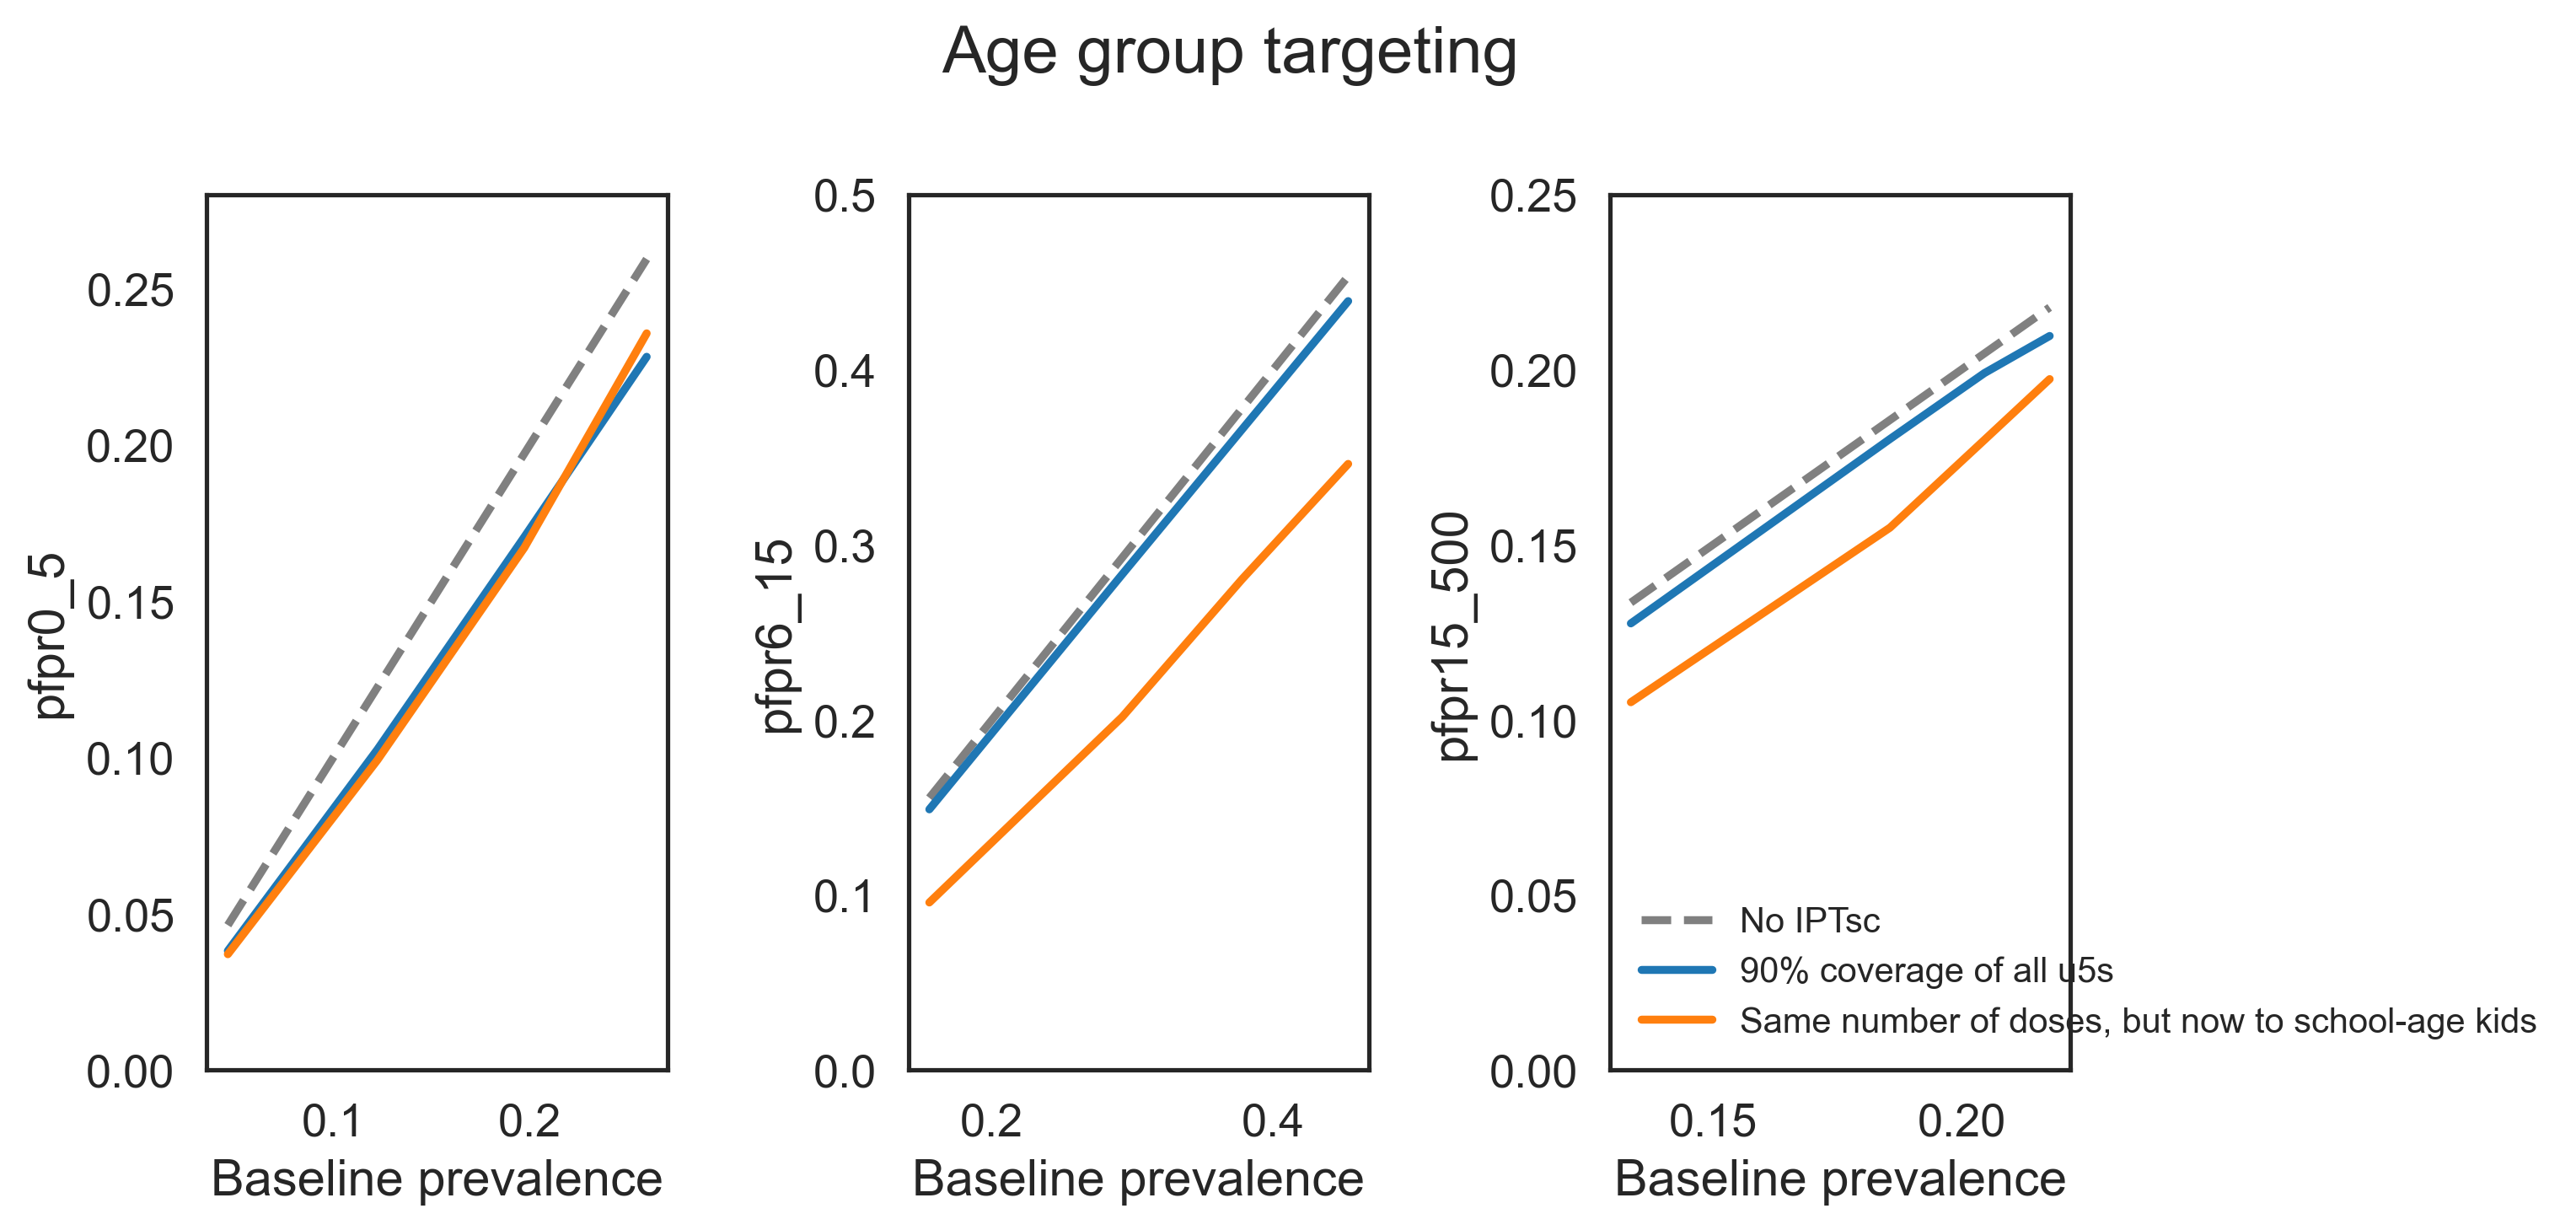

In [149]:
scenario_dict = {
    30: "No IPTsc",
    32: "90% coverage of all u5s",
    33: "Same number of doses, but now to school-age kids"
}

modality_plot_by_group(list(scenario_dict.keys()), scenario_dict, suptitle="Age group targeting")

# Results in terms of burden reduction (clinical/severe cases)

In [151]:
df_agg_w_baseline_and_burden = df_agg_w_baseline.copy(deep=True)

In [152]:
# Add total clinical burden fields:

for agebin in ["0_5", "2_10","6_15","15_500","_all"]:
    for case_type in ["clinical", "severe"]:
        old = df_agg_w_baseline_and_burden["{}_incidence{}_BASELINE".format(case_type, agebin)]
        new = df_agg_w_baseline_and_burden["{}_incidence{}".format(case_type, agebin)]
        frac_averted = (old-new)/old
        
        df_agg_w_baseline_and_burden["frac_averted_{}_{}".format(case_type, agebin)] = frac_averted
    

Text(0, 0.5, 'Percent reduction')

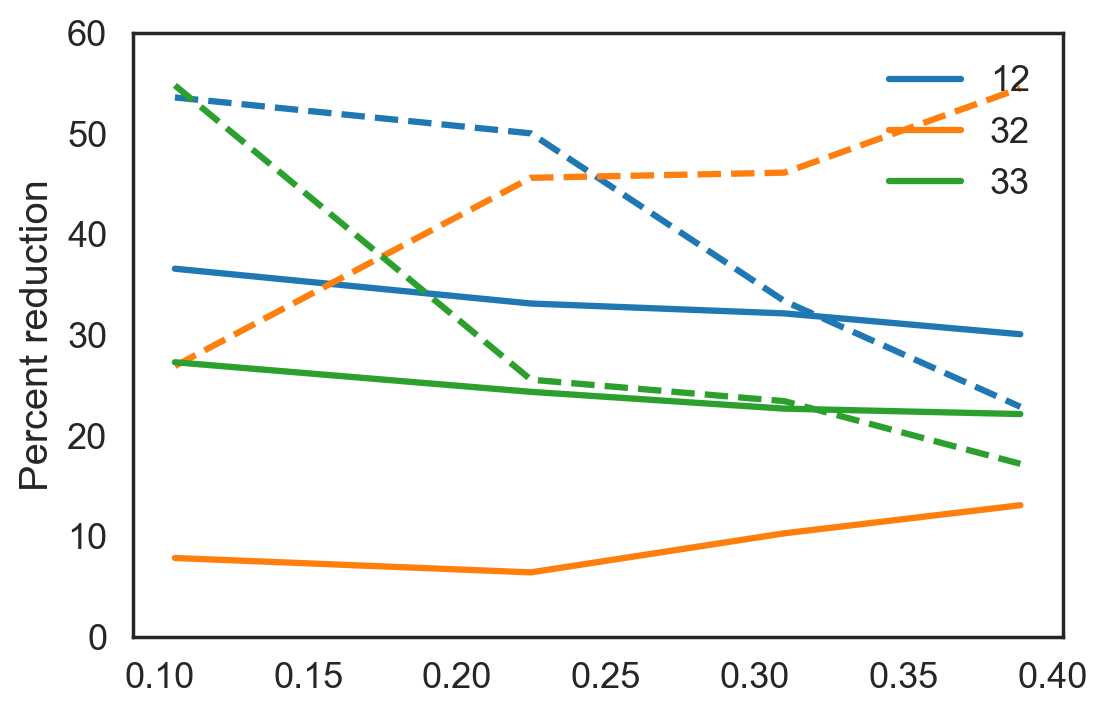

In [197]:
scenario_numbers = [12,32,33]

plt.figure(dpi=200)

i = 0
for s in scenario_numbers:
    sdf = df_agg_w_baseline_and_burden[df_agg_w_baseline_and_burden["scenario_number"]==s]
    
    c = "C{}".format(i)
    plt.plot(sdf["pfpr2_10_BASELINE"], 100*sdf["frac_averted_clinical__all"], label=s, c=c)
    plt.plot(sdf["pfpr2_10_BASELINE"], 100*sdf["frac_averted_severe__all"], c=c,linestyle='dashed')
    
    i = i+1
plt.legend()
plt.ylim([0,60])
plt.ylabel("PfPR2_10")
plt.ylabel("Percent reduction")

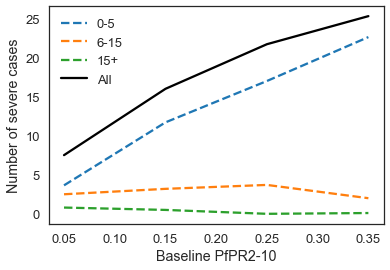

In [183]:
# plt.plot(df_baseline["burnin_approx_pfpr2_10"], df_baseline["clinical_incidence0_5"], c="C0")
plt.plot(df_baseline["burnin_approx_pfpr2_10"], df_baseline["severe_incidence0_5"]*df_baseline["pop0_5"], c="C0", linestyle='dashed', label="0-5")
plt.plot(df_baseline["burnin_approx_pfpr2_10"], df_baseline["severe_incidence6_15"]*df_baseline["pop6_15"], c="C1", linestyle='dashed', label="6-15")
plt.plot(df_baseline["burnin_approx_pfpr2_10"], df_baseline["severe_incidence15_500"]*df_baseline["pop15_500"], c="C2", linestyle='dashed', label="15+")
plt.plot(df_baseline["burnin_approx_pfpr2_10"], df_baseline["severe_incidence_all"]*df_baseline["pop_all"], c="black", linestyle='solid', label="All")

plt.xlabel("Baseline PfPR2-10")
plt.ylabel("Number of severe cases")
plt.legend()

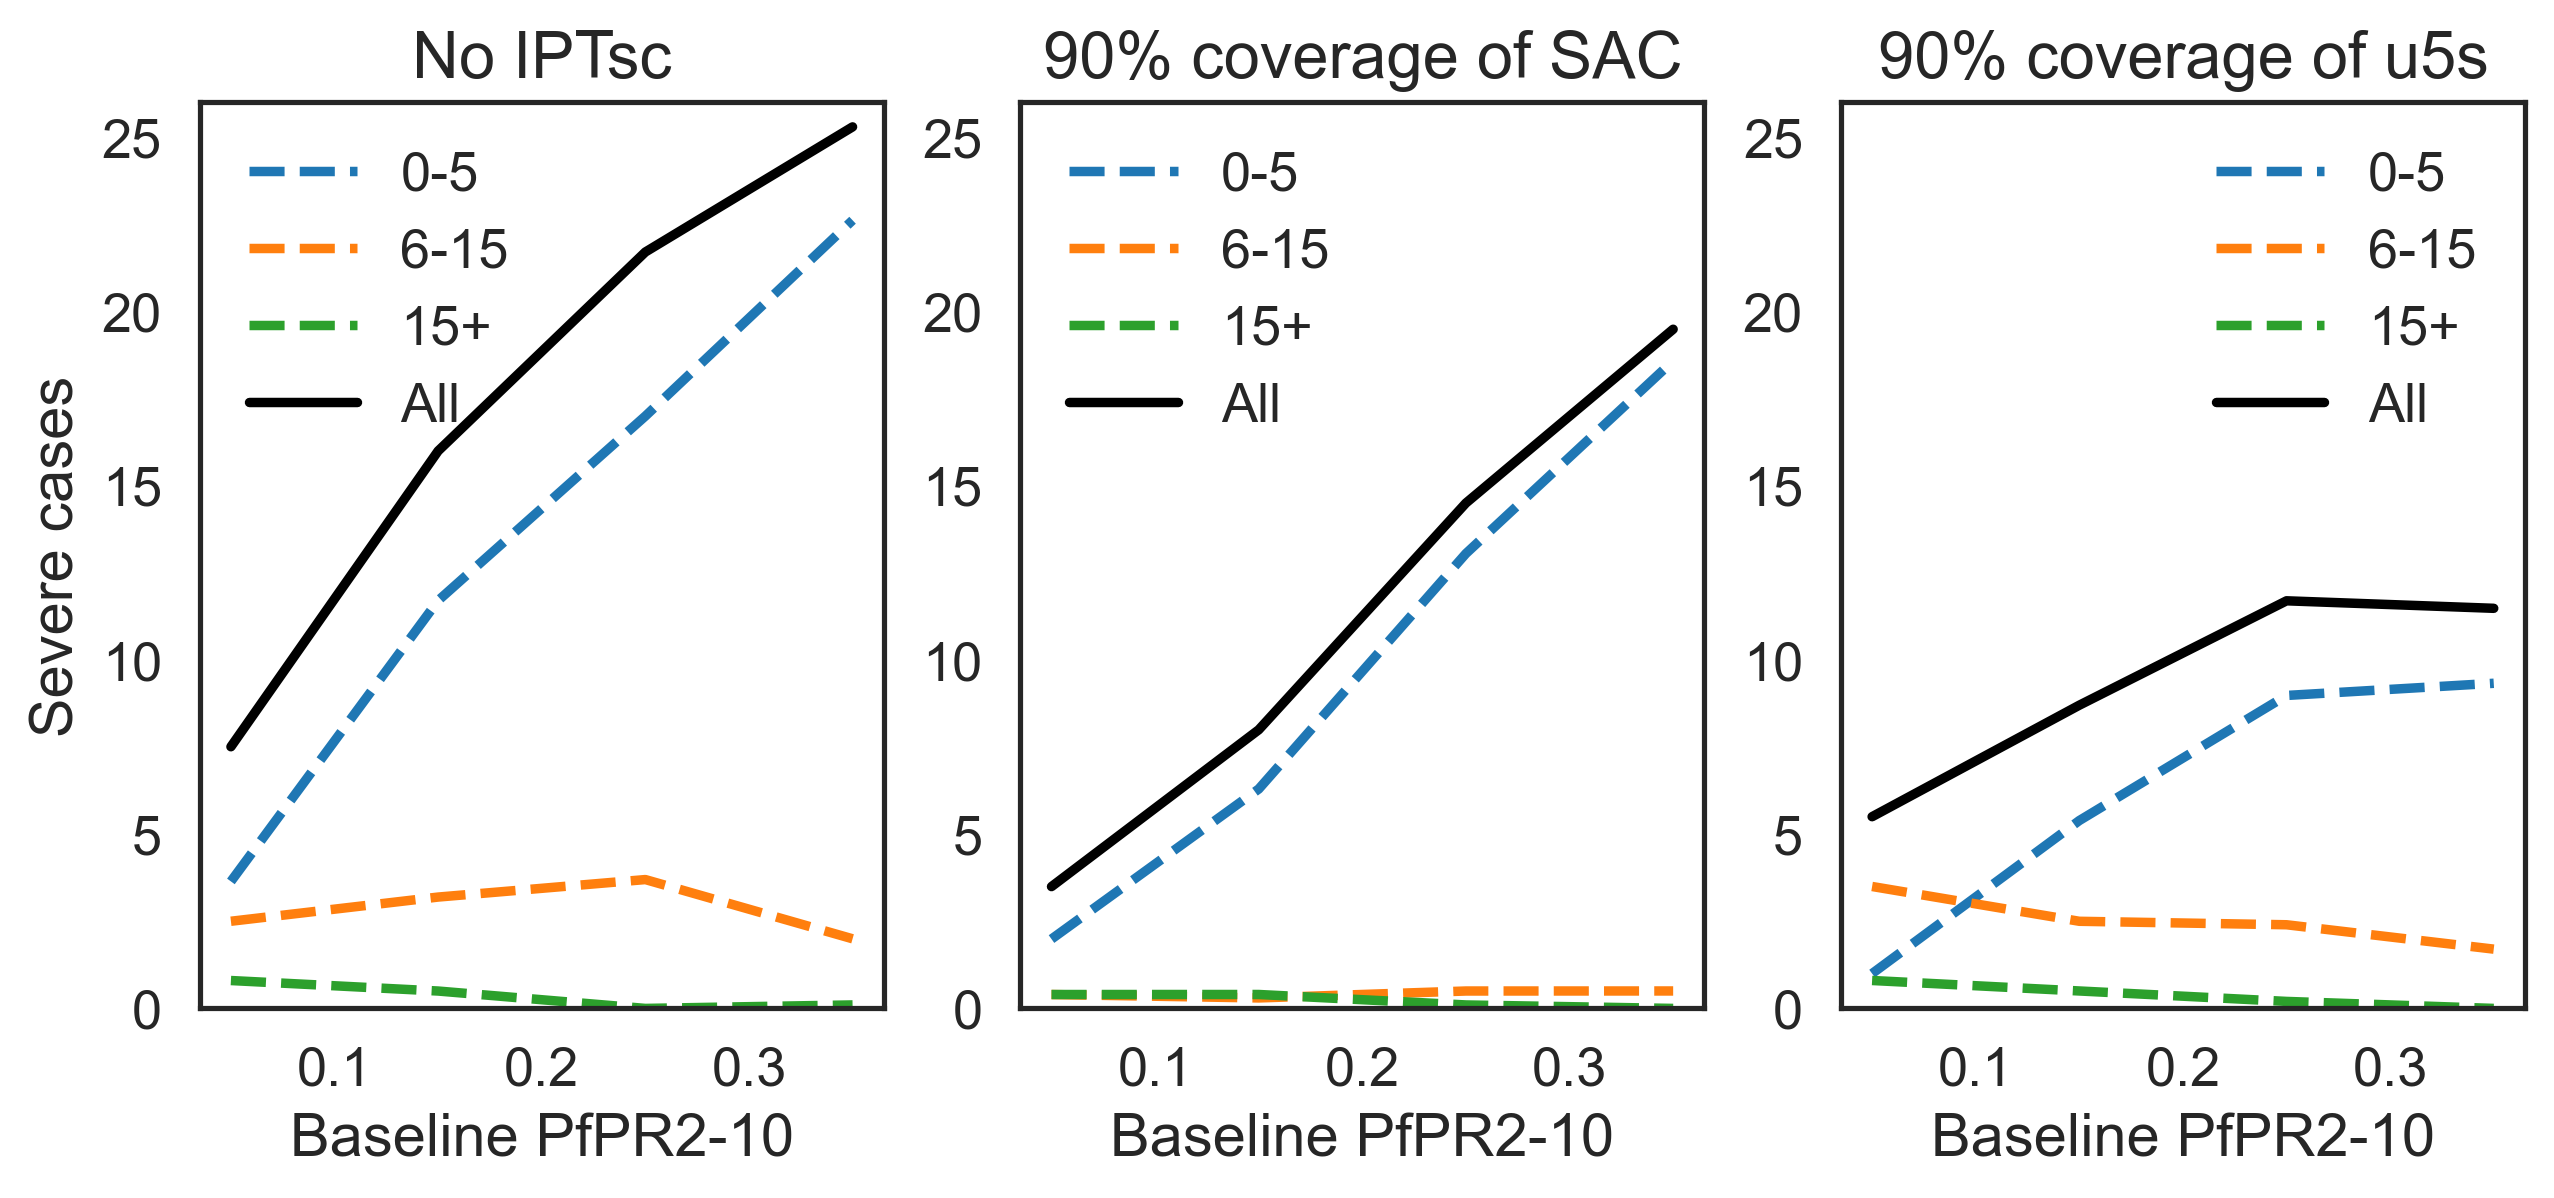

In [236]:
scenario_dict = {
    30: "No IPTsc",
    12: "90% coverage of SAC",
    32: "90% coverage of u5s"
}

case_type = "severe"

scenarios = list(scenario_dict.keys())
s_dict = {}
for s in scenarios:
    s_dict[s] = df_agg_w_baseline_and_burden[df_agg_w_baseline_and_burden["scenario_number"]==s]
        
plt.figure(dpi=300, figsize=(10,4))
i = 0
for s in scenarios:
    plt.subplot(1,3,i+1)
    plt.plot(s_dict[s]["burnin_approx_pfpr2_10"], s_dict[s]["{}_incidence0_5".format(case_type)]*s_dict[s]["pop0_5"], c="C0", linestyle='dashed', label="0-5")
    plt.plot(s_dict[s]["burnin_approx_pfpr2_10"], s_dict[s]["{}_incidence6_15".format(case_type)]*s_dict[s]["pop6_15"], c="C1", linestyle='dashed', label="6-15")
    plt.plot(s_dict[s]["burnin_approx_pfpr2_10"], s_dict[s]["{}_incidence15_500".format(case_type)]*s_dict[s]["pop15_500"], c="C2", linestyle='dashed', label="15+")
    plt.plot(s_dict[s]["burnin_approx_pfpr2_10"], s_dict[s]["{}_incidence_all".format(case_type)]*s_dict[s]["pop_all"], c="black", linestyle='solid', label="All")

    plt.ylim([0,26])
    plt.title(scenario_dict[s])
    plt.legend()
    plt.xlabel("Baseline PfPR2-10")
    if i == 0:
        plt.ylabel("Severe cases")
    
    i += 1


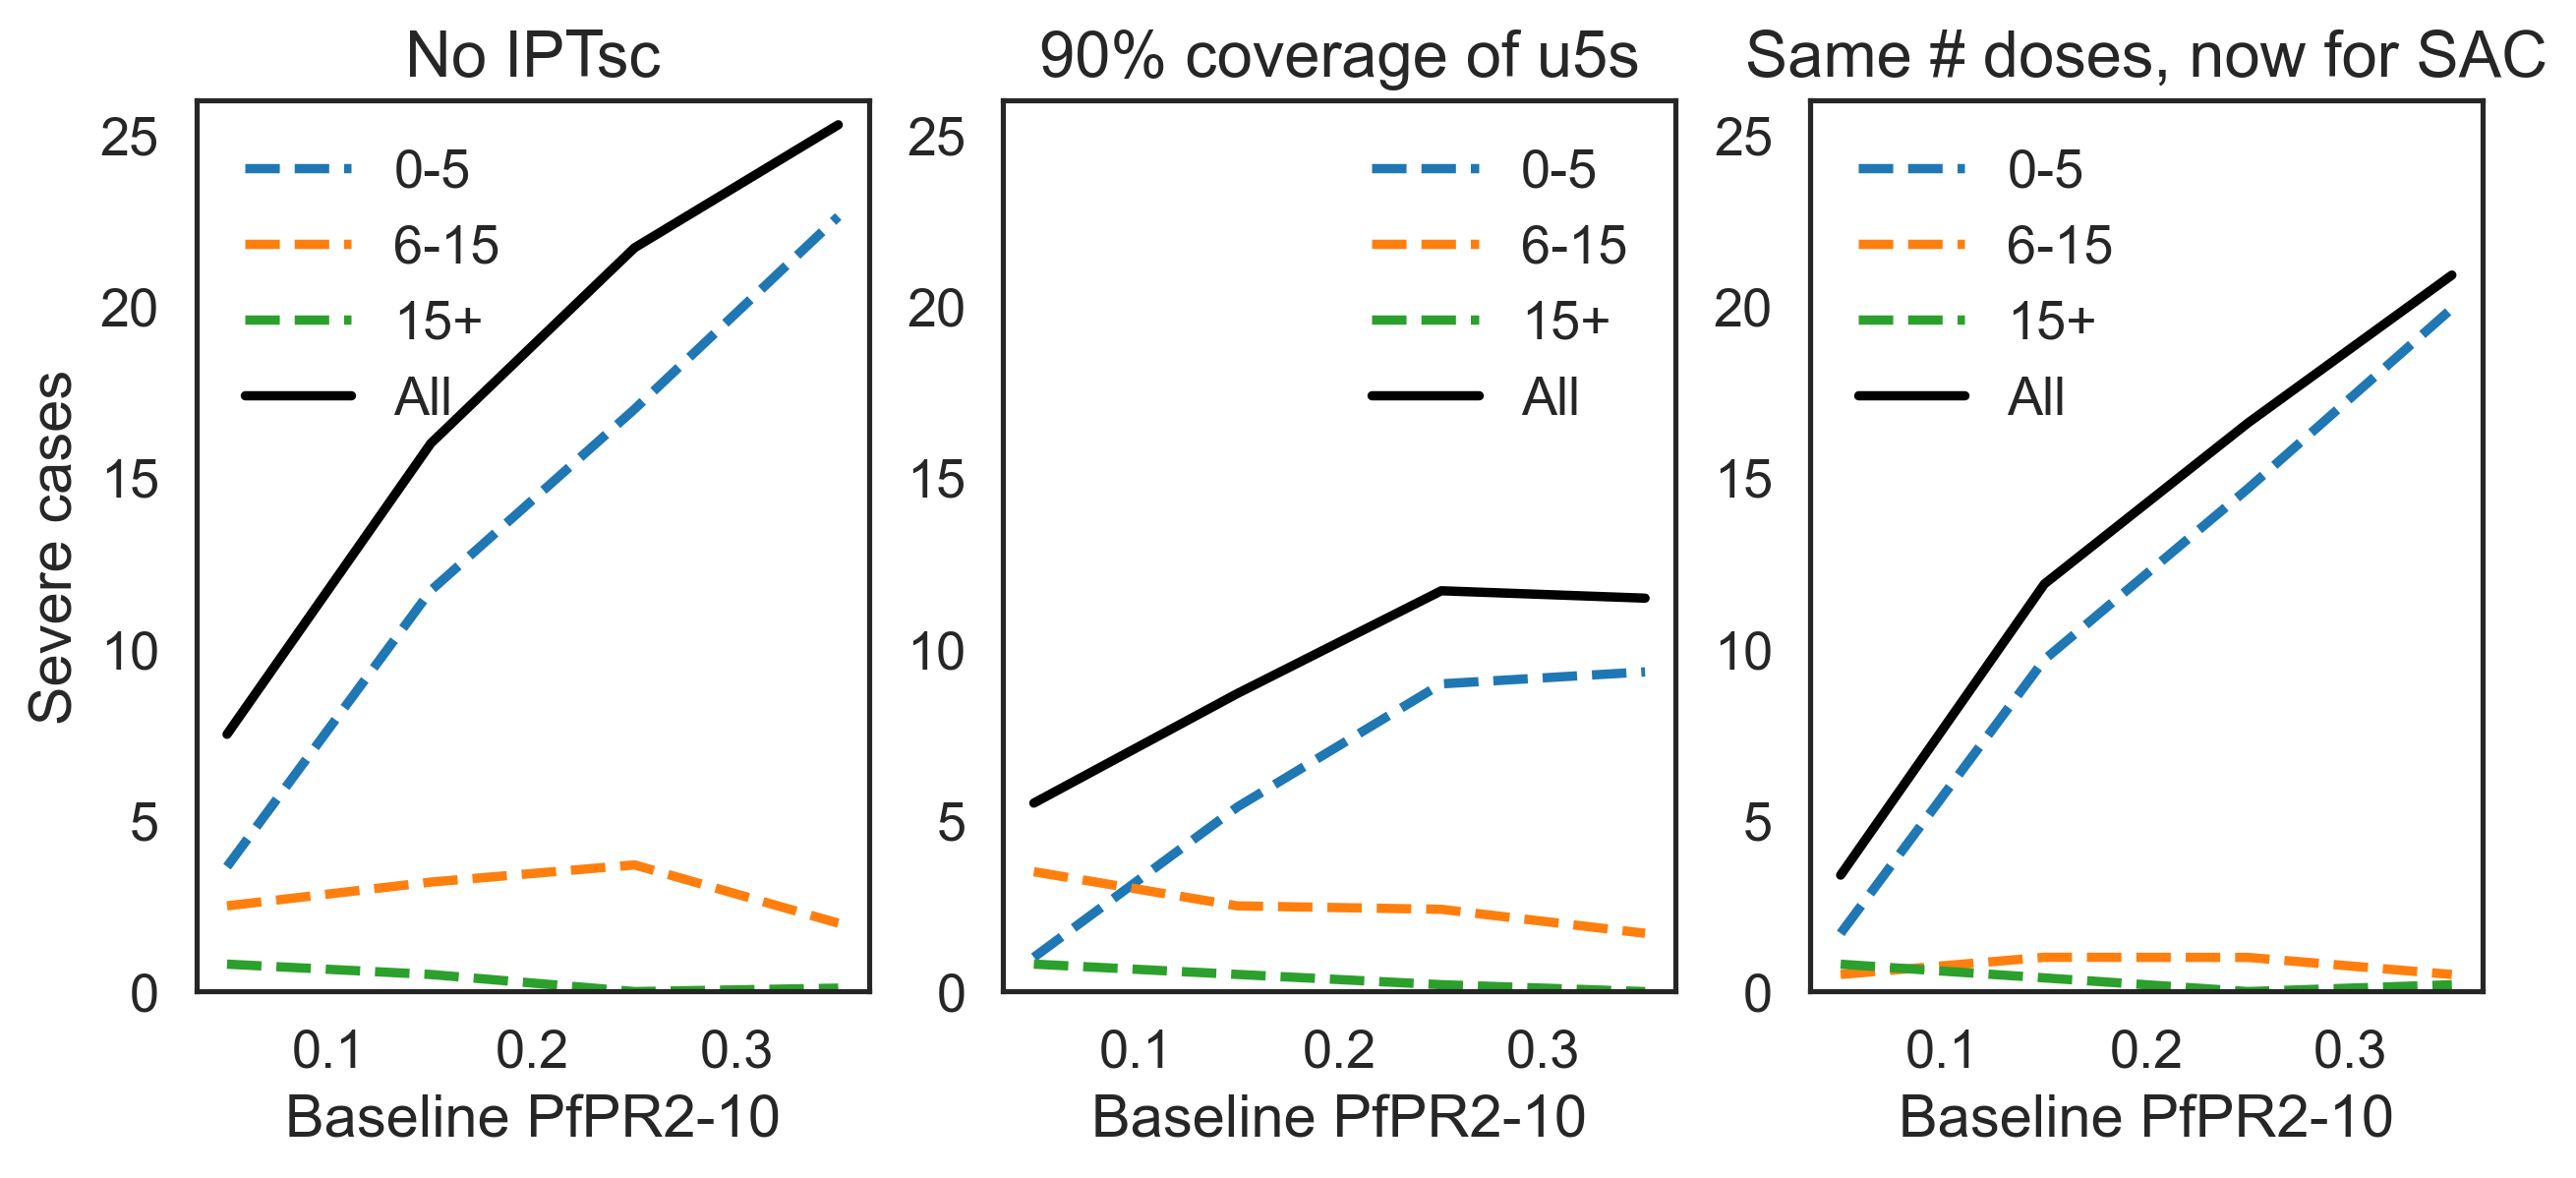

In [237]:
scenario_dict = {
    30: "No IPTsc",
    32: "90% coverage of u5s",
    33: "Same # doses, now for SAC"
}

case_type = "severe"

scenarios = list(scenario_dict.keys())
s_dict = {}
for s in scenarios:
    s_dict[s] = df_agg_w_baseline_and_burden[df_agg_w_baseline_and_burden["scenario_number"]==s]
        
plt.figure(dpi=300, figsize=(10,4))
i = 0
for s in scenarios:
    plt.subplot(1,3,i+1)
    plt.plot(s_dict[s]["burnin_approx_pfpr2_10"], s_dict[s]["{}_incidence0_5".format(case_type)]*s_dict[s]["pop0_5"], c="C0", linestyle='dashed', label="0-5")
    plt.plot(s_dict[s]["burnin_approx_pfpr2_10"], s_dict[s]["{}_incidence6_15".format(case_type)]*s_dict[s]["pop6_15"], c="C1", linestyle='dashed', label="6-15")
    plt.plot(s_dict[s]["burnin_approx_pfpr2_10"], s_dict[s]["{}_incidence15_500".format(case_type)]*s_dict[s]["pop15_500"], c="C2", linestyle='dashed', label="15+")
    plt.plot(s_dict[s]["burnin_approx_pfpr2_10"], s_dict[s]["{}_incidence_all".format(case_type)]*s_dict[s]["pop_all"], c="black", linestyle='solid', label="All")

    plt.ylim([0,26])
    plt.title(scenario_dict[s])
    plt.legend()
    plt.xlabel("Baseline PfPR2-10")
    if i == 0:
        plt.ylabel("Severe cases")
    
    i += 1


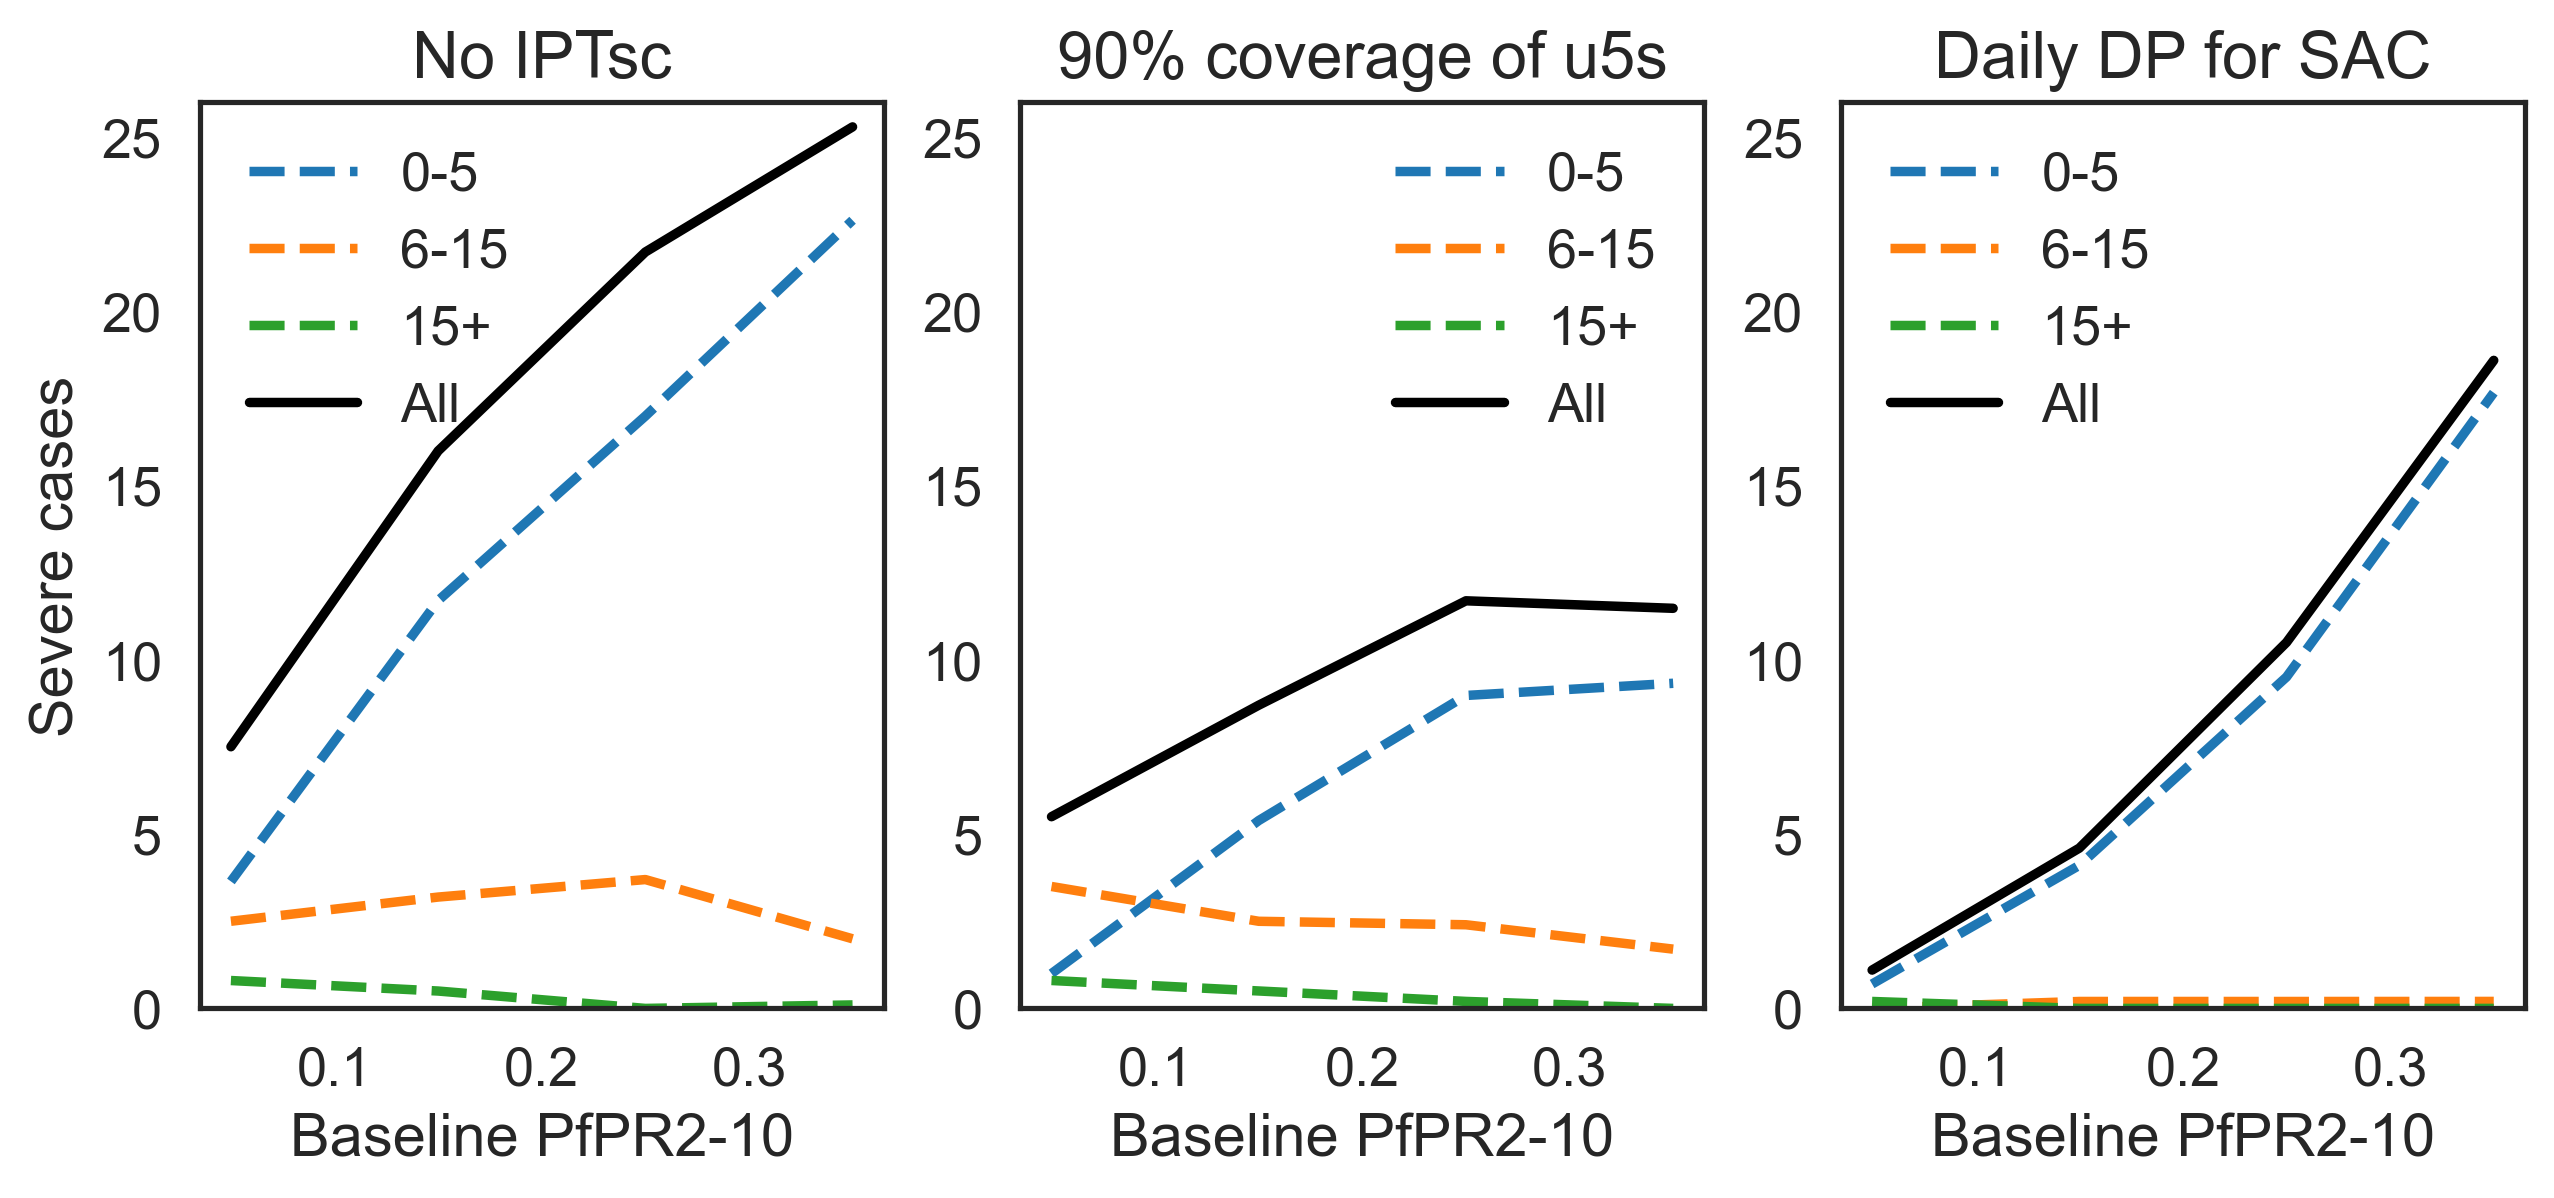

In [240]:
scenario_dict = {
    30: "No IPTsc",
    32: "90% coverage of u5s",
    27: "Daily DP for SAC"
}

case_type = "severe"

scenarios = list(scenario_dict.keys())
s_dict = {}
for s in scenarios:
    s_dict[s] = df_agg_w_baseline_and_burden[df_agg_w_baseline_and_burden["scenario_number"]==s]
        
plt.figure(dpi=300, figsize=(10,4))
i = 0
for s in scenarios:
    plt.subplot(1,3,i+1)
    plt.plot(s_dict[s]["burnin_approx_pfpr2_10"], s_dict[s]["{}_incidence0_5".format(case_type)]*s_dict[s]["pop0_5"], c="C0", linestyle='dashed', label="0-5")
    plt.plot(s_dict[s]["burnin_approx_pfpr2_10"], s_dict[s]["{}_incidence6_15".format(case_type)]*s_dict[s]["pop6_15"], c="C1", linestyle='dashed', label="6-15")
    plt.plot(s_dict[s]["burnin_approx_pfpr2_10"], s_dict[s]["{}_incidence15_500".format(case_type)]*s_dict[s]["pop15_500"], c="C2", linestyle='dashed', label="15+")
    plt.plot(s_dict[s]["burnin_approx_pfpr2_10"], s_dict[s]["{}_incidence_all".format(case_type)]*s_dict[s]["pop_all"], c="black", linestyle='solid', label="All")

    plt.ylim([0,26])
    plt.title(scenario_dict[s])
    plt.legend()
    plt.xlabel("Baseline PfPR2-10")
    if i == 0:
        plt.ylabel("Severe cases")
    
    i += 1


In [204]:
# Fraction of burden in each age bin:
df_baseline["clinical_cases_all"] = df_baseline["clinical_incidence_all"]*df_baseline["pop_all"]
df_baseline["clinical_cases0_5"] = df_baseline["clinical_incidence0_5"]*df_baseline["pop0_5"]
df_baseline["clinical_cases6_15"] = df_baseline["clinical_incidence6_15"]*df_baseline["pop6_15"]
print(df_baseline["clinical_cases0_5"]/df_baseline["clinical_cases_all"])
print(df_baseline["clinical_cases6_15"]/df_baseline["clinical_cases_all"])

df_baseline["severe_cases_all"] = df_baseline["severe_incidence_all"]*df_baseline["pop_all"]
df_baseline["severe_cases0_5"] = df_baseline["severe_incidence0_5"]*df_baseline["pop0_5"]
df_baseline["severe_cases6_15"] = df_baseline["severe_incidence6_15"]*df_baseline["pop6_15"]
print(df_baseline["severe_cases0_5"]/df_baseline["severe_cases_all"])
print(df_baseline["severe_cases6_15"]/df_baseline["severe_cases_all"])

0    0.174096
1    0.277047
2    0.368201
3    0.428455
dtype: float64
0    0.333898
1    0.381679
2    0.378039
3    0.374842
dtype: float64
0    0.485329
1    0.731622
2    0.783074
3    0.894079
dtype: float64
0    0.333119
1    0.199753
2    0.170348
3    0.078963
dtype: float64


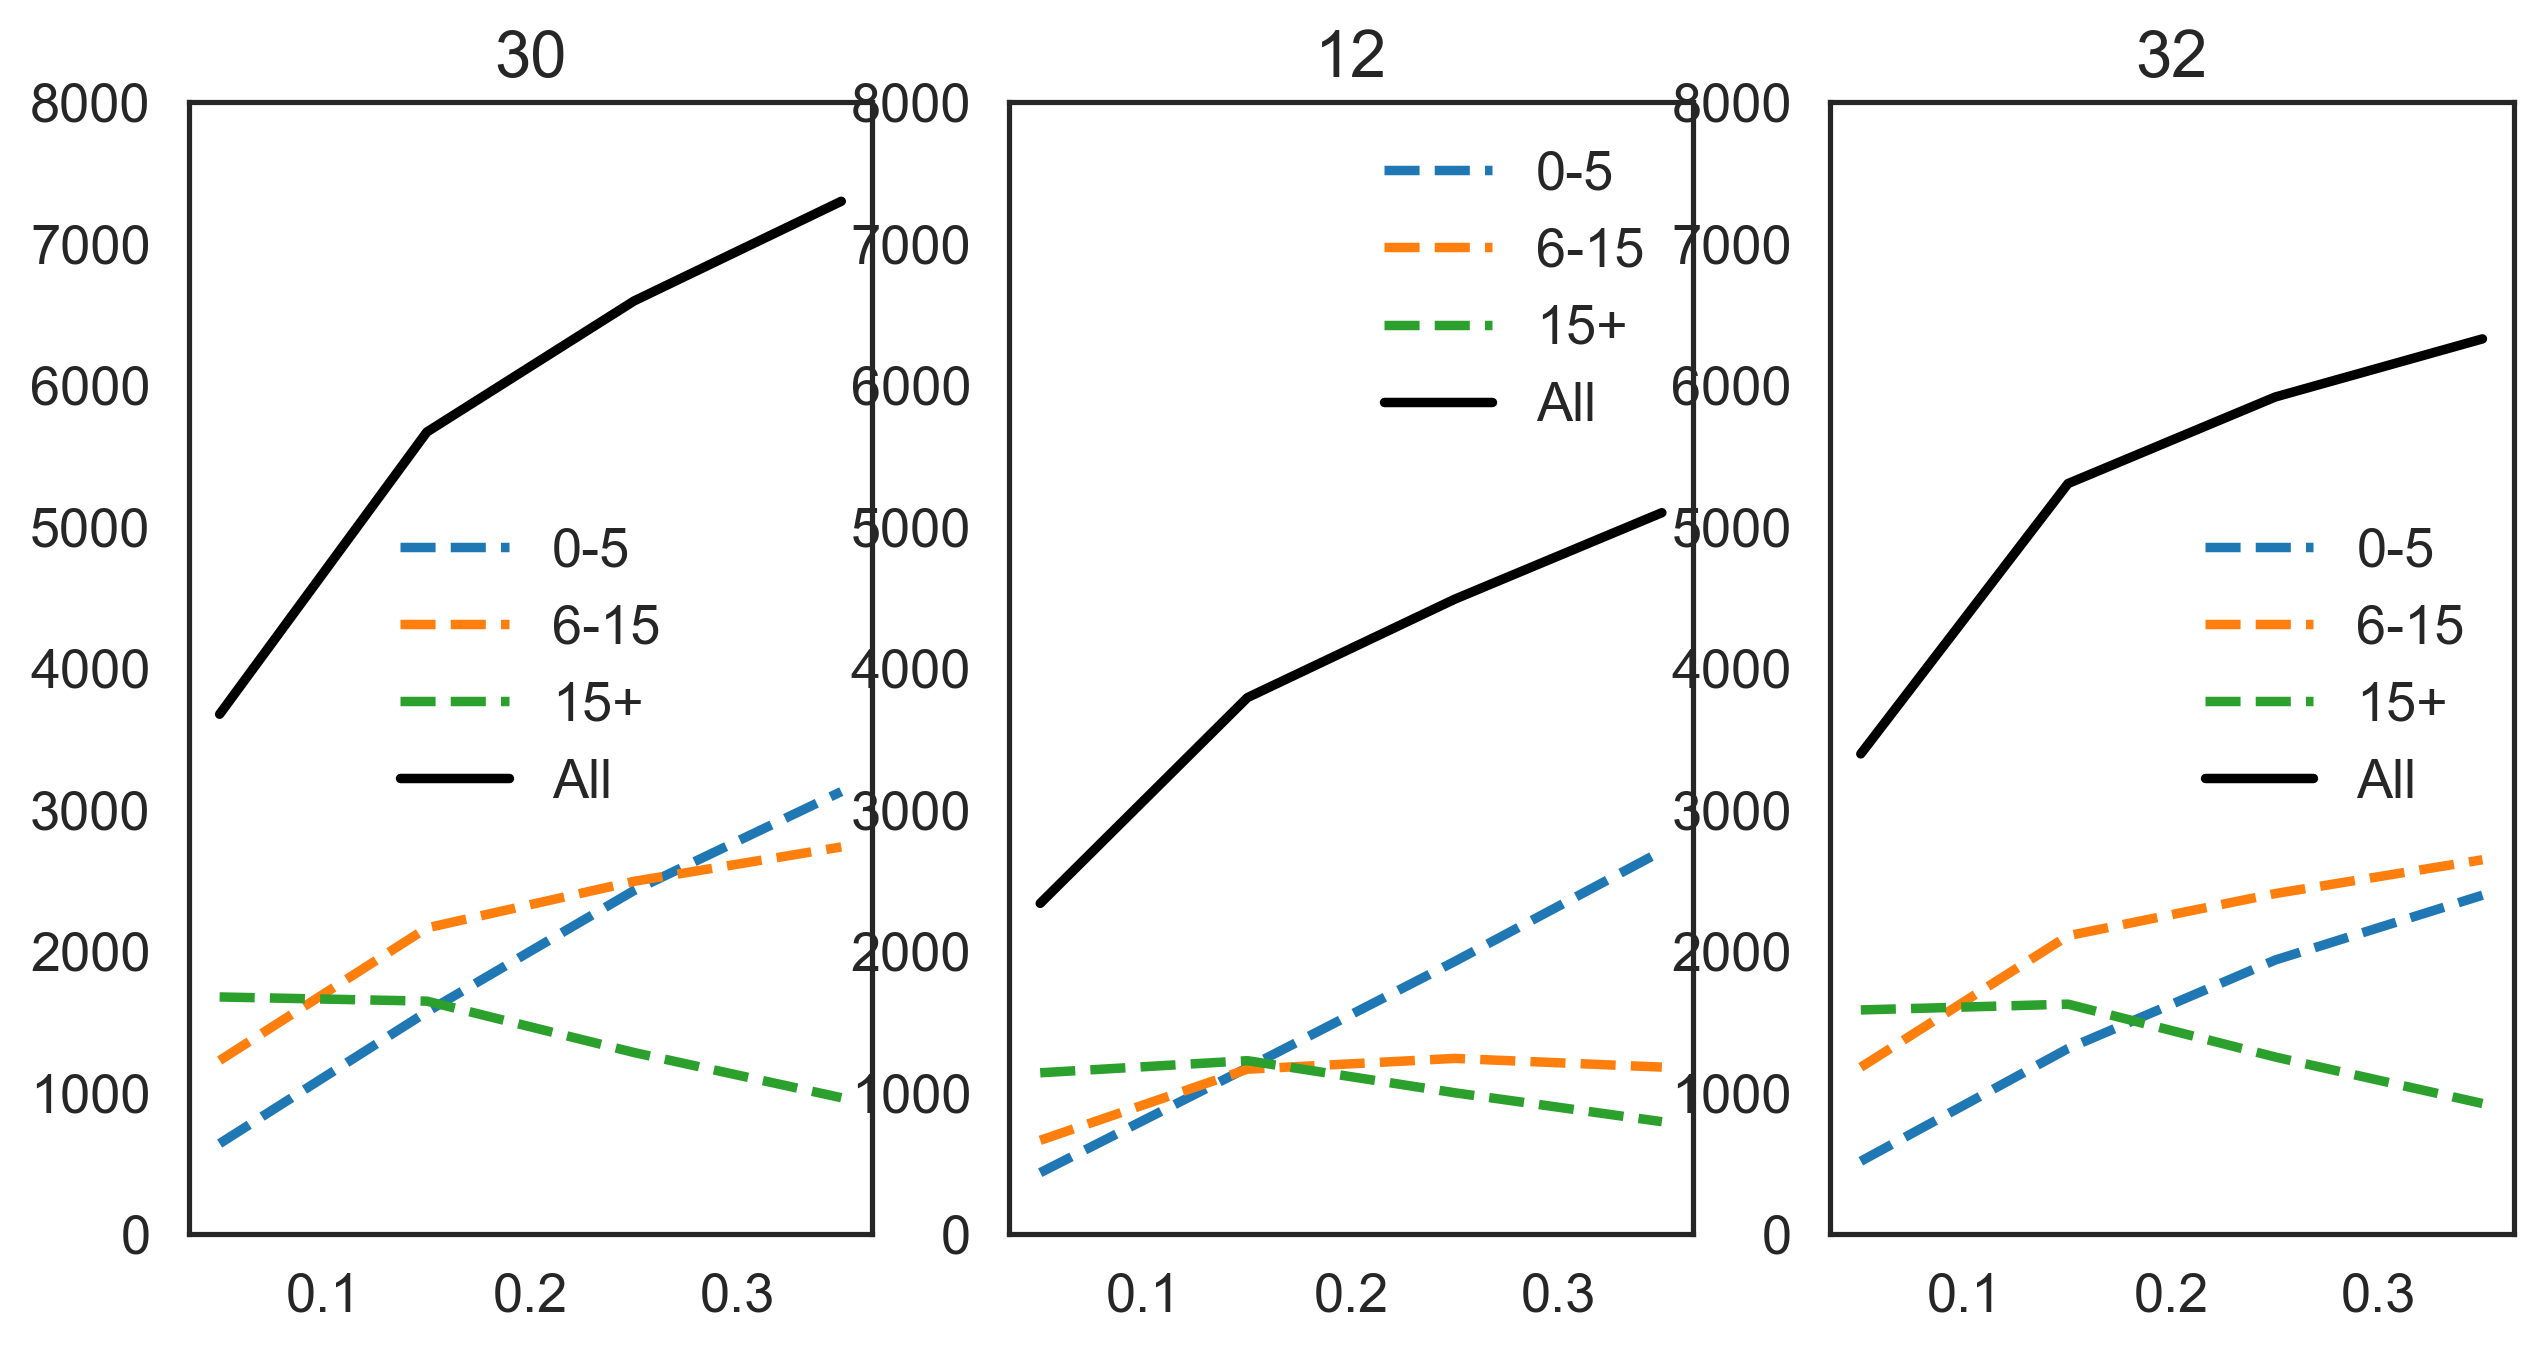

In [205]:
scenario_dict = {
    30: "No IPTsc",
    12: "90% coverage of all school-age kids",
    32: "90% coverage of all u5s"
}

case_type = "clinical"

scenarios = list(scenario_dict.keys())
s_dict = {}
for s in scenarios:
    s_dict[s] = df_agg_w_baseline_and_burden[df_agg_w_baseline_and_burden["scenario_number"]==s]
        
plt.figure(dpi=300, figsize=(10,5))
i = 0
for s in scenarios:
    plt.subplot(1,3,i+1)
    plt.plot(s_dict[s]["burnin_approx_pfpr2_10"], s_dict[s]["{}_incidence0_5".format(case_type)]*s_dict[s]["pop0_5"], c="C0", linestyle='dashed', label="0-5")
    plt.plot(s_dict[s]["burnin_approx_pfpr2_10"], s_dict[s]["{}_incidence6_15".format(case_type)]*s_dict[s]["pop6_15"], c="C1", linestyle='dashed', label="6-15")
    plt.plot(s_dict[s]["burnin_approx_pfpr2_10"], s_dict[s]["{}_incidence15_500".format(case_type)]*s_dict[s]["pop15_500"], c="C2", linestyle='dashed', label="15+")
    plt.plot(s_dict[s]["burnin_approx_pfpr2_10"], s_dict[s]["{}_incidence_all".format(case_type)]*s_dict[s]["pop_all"], c="black", linestyle='solid', label="All")
    i += 1
    plt.ylim([0,8000])
    plt.title(s)
    plt.legend()

In [206]:
def burden_reduction_plot_by_group(scenarios, label_dict, suptitle=None, color_dict=None, linestyle_dict=None):
    plt.close("all")
    plt.figure(dpi=300, figsize=(10,5))
    
    agebins = ["0_5", "6_15","15_500","_all"]
    
    s_dict = {}
    for s in scenarios:
        s_dict[s] = df_agg_w_baseline_and_burden[df_agg_w_baseline_and_burden["scenario_number"]==s]
#         s_dict[s] = df[df["scenario_number"]==s]
    
    for i in range(3):
        agebin = agebins[i]
        
        for j in range(2):
            if j == 0:
                case_type = "clinical"
            elif j == 1:
                case_type = "severe"
                
            ax = plt.subplot(2,3,i*3+j)
        
        
            for s in scenarios:
                linestyle='solid'
                c = None
                if s == 30:
                    linestyle='dashed'
                    c = 'gray'
                else:
                    if color_dict:
                        c = color_dict[s]
                    if linestyle_dict:
                        linestyle = linestyle_dict[s]

                x = s_dict[s]["{}_BASELINE".format(metric)]
                y = s_dict[s][metric]
                plt.plot(x,y, label=label_dict[s], linestyle=linestyle, c=c)

        if i == 2:
            plt.legend(fontsize=10)
        plt.xlabel("Baseline prevalence".format(metric))
        plt.ylabel(metric)
#         plt.title(metric)

    plt.suptitle(suptitle)
    plt.tight_layout()
    plt.show()

# Direct effect vs community effect

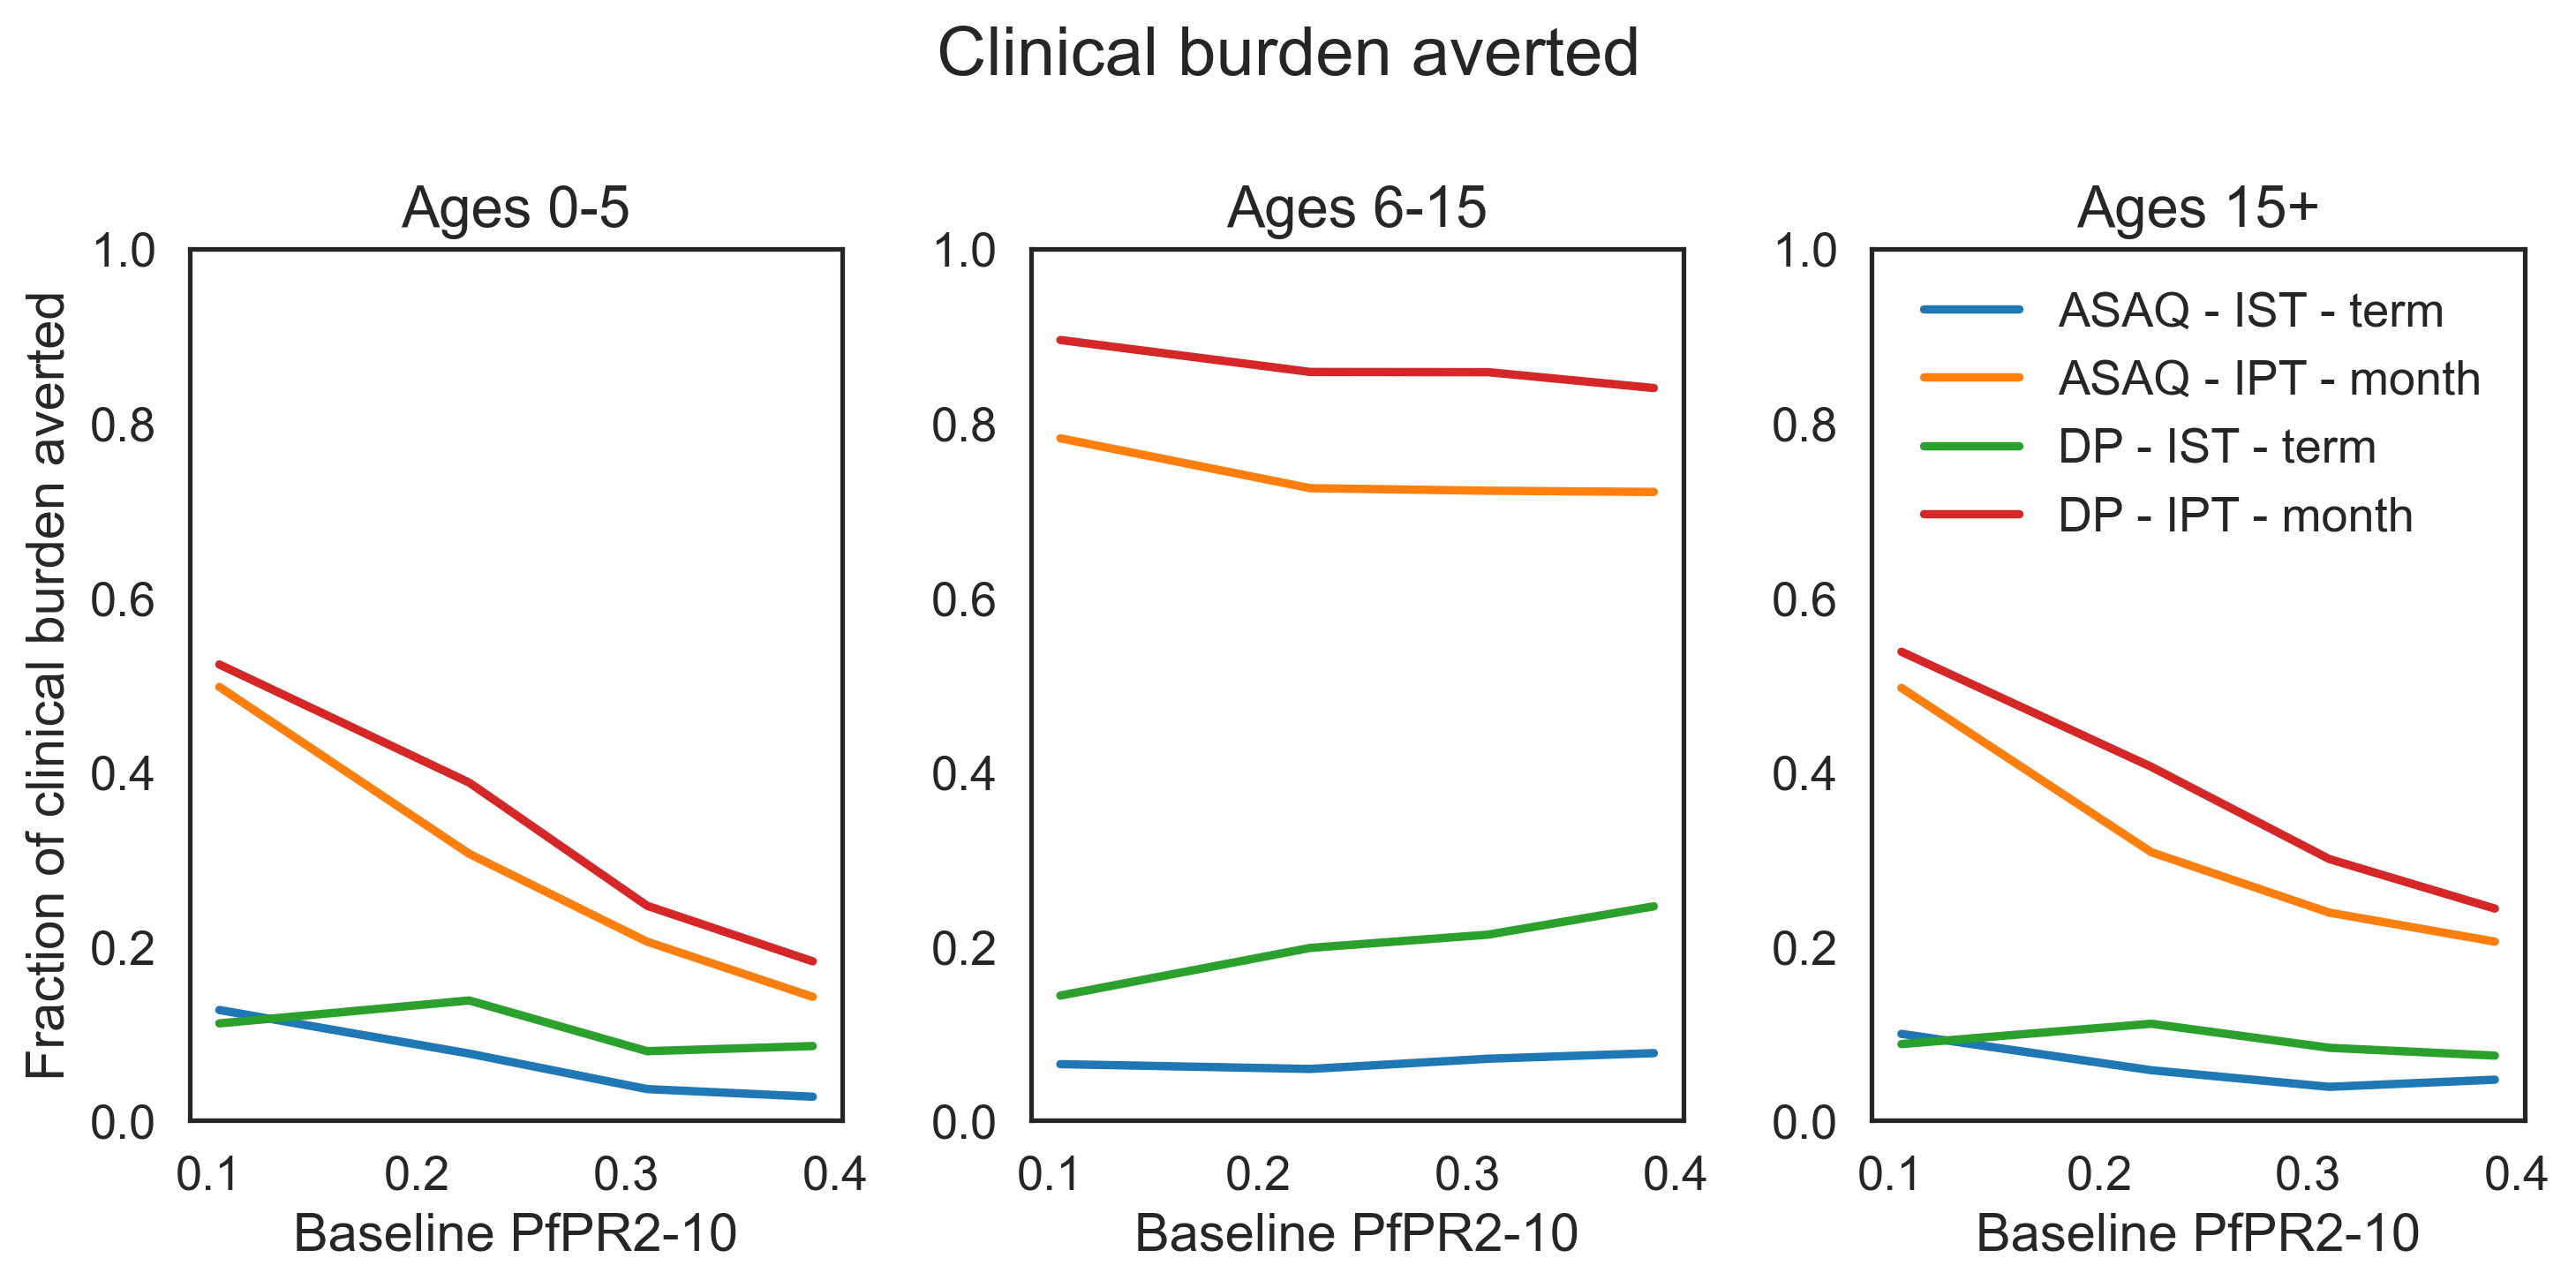

In [229]:
label_dict = {
    7: "ASAQ - IST - term",
    4: "ASAQ - IPT - month",
    19: "DP - IST - term",
    16: "DP - IPT - month",
}

    
    

scenario_list = list(label_dict.keys())

s_dict = {}
for s in scenario_list:
    s_dict[s] = df_agg_w_baseline_and_burden[df_agg_w_baseline_and_burden["scenario_number"]==s]

    
color_dict = {}
for i in range(4):
    color_dict[scenario_list[i]] = "C{}".format(i)
    
    
plt.figure(dpi=300, figsize=(10,5))

    
agebins = ["0_5", "6_15", "15_500"]
agebin_labels = ["Ages 0-5", "Ages 6-15", "Ages 15+"]

for i in range(3):
    agebin = agebins[i]
    agebin_label = agebin_labels[i]
    plt.subplot(1,3,i+1)
    
    for s in scenario_list:
        linestyle='solid'
        if color_dict:
            c = color_dict[s]

        x = s_dict[s]["pfpr2_10_BASELINE"]
        y = s_dict[s]["frac_averted_clinical_{}".format(agebin)]
        plt.plot(x,y, label=label_dict[s], linestyle=linestyle, c=c)
        if i == 2:
            plt.legend()
        if i == 0:
            plt.ylabel("Fraction of clinical burden averted")
        plt.ylim([0,1])
        plt.xlabel("Baseline PfPR2-10")
        plt.title(agebin_label)
plt.suptitle("Clinical burden averted")
plt.tight_layout()

In [220]:
s_dict[s]

burnin_approx_pfpr2_10  scenario_number   pfpr0_5  pfpr2_10  pfpr6_15  \
7                      0.05                7  0.043800  0.088523  0.122471   
41                     0.15                7  0.113407  0.194969  0.243511   
75                     0.25                7  0.183142  0.277607  0.327970   
109                    0.35                7  0.253999  0.358478  0.403299   

     pfpr15_500  pfpr_all  clinical_incidence0_5  clinical_incidence2_10  \
7      0.121791  0.109304               0.710057                0.936863   
41     0.174525  0.182080               1.794420                1.946730   
75     0.196588  0.227296               2.887676                2.743156   
109    0.210383  0.266177               3.847531                3.318326   

     clinical_incidence6_15               ...                 \
7                  1.053387               ...                  
41                 1.786281               ...                  
75                 2.122651               ...                  
109                2.280283               ...                  

     pop2_10_BASELINE  pop6_15_BASELINE  pop15_500_BASELINE  pop_all_BASELINE  \
7         1123.899452       1088.566849         2982.080548       4986.770137   
41        1164.875616       1138.870411         2943.380548       5037.187123   
75        1155.678356       1090.597534         2926.492877       4974.979178   
109       1129.823562       1106.489041         2934.400274       4981.860000   

     burnin_habitat_scale_BASELINE  out_of_school_rate_BASELINE  \
7                              7.1                          0.0   
41                             7.7                          0.0   
75                             8.2                          0.0   
109                            8.6                          0.0   

     Run_Number_BASELINE  scenario_number_BASELINE  smc_on_BASELINE  \
7                    4.5                      30.0            False   
41                   4.5                      30.0            False   
75                   4.5                      30.0            False   
109                  4.5                      30.0            False   

     within_school_coverage_BASELINE  
7                                0.9  
41                               0.9  
75                               0.9  
109                              0.9  

[4 rows x 53 columns]